#WALMART : Business Case Study - Central Limit Theorem and Confidence Interval

#  About WALMART

Walmart, founded in 1962 by Sam Walton, is a retail giant and one of the world's largest and most influential companies. Headquartered in Bentonville, Arkansas, this American multinational corporation has established itself as a global powerhouse in the retail industry. Walmart operates a vast network of hypermarkets, discount department stores, and grocery stores under various brand names across the United States and in numerous countries around the world.

Known for its "Everyday Low Prices" strategy, Walmart has redefined the retail landscape with its commitment to offering a wide range of products at affordable prices. With its extensive supply chain and efficient distribution systems, the company has played a pivotal role in shaping consumer expectations and shopping habits. Beyond retail, Walmart has also ventured into e-commerce, technology innovation, and sustainability initiatives, further solidifying its position as a key player in the modern retail ecosystem.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset link:** https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094


The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

**User_ID:**	User ID

**Product_ID:**	Product ID

**Gender:**	Sex of User

**Age:**	Age in bins

**Occupation:**	Occupation(Masked)

**City_Category:**	Category of the City (A,B,C)

**StayInCurrentCityYears:**	Number of years stay in current city

**Marital_Status:**	Marital Status

**ProductCategory:**	Product Category (Masked)

**Purchase:**	Purchase Amount

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 164MB/s] 


In [ ]:
df = pd.read_csv('walmart_data.csv')
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
df.tail()

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490

In [ ]:
df.shape

(550068, 10)

**There are 550068 number of rows and 10 columns in the dataset given.**

# Checking for nulls

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**There are no null values in any of the attributes.**

# Checking for duplicates

In [ ]:
df.duplicated().sum()

0

**No duplicate records found.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Changing the data type of columns

**Here the following columns have categorical values, hence we need to convert the datatype from int and object to category.**



*    User_ID
*    Product_ID
*    Gender
*    Age
*    Occupation
*    City_Category
*    State_In_Current_City_Years
*    Marital_Status
*    Product_Category


In [ ]:
c = df.columns[:-1]
for i in c:
    df[i] = df[i].astype('category')

**Renaming the column 'Purchase' as 'Purchase_Amount'**

In [ ]:
df.rename(columns={'Purchase' : 'Purchase_Amount'}, inplace = True)

**Renaming the values in Gender and Marital_status columns**

In [ ]:
df['Gender'].replace({'F':'Female', 'M':'Male'},inplace = True)

In [ ]:
df['Marital_Status'].replace({0:'Unmarried', 1:'Married'},inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase_Amount             550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


# Describing the numerical attributes in the data.

In [ ]:
df.describe()

Purchase_Amount
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000

**Insights :**

*    The range of Purchase_Amount is between 23961 USD and 12 USD.
*    The mean Purchase_Amount is 9264 USD and the  median is 8047 USD.
*    About 75 % of the users make  purchases for 12054 USD  or less.
*    About 25 % of the users make purchases for 5823 USD or less.

# Describing the categorical attributes in the data.

In [ ]:
df.describe(include='category')

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068     550068  550068  550068      550068        550068   
unique     5891       3631       2       7          21             3   
top     1001680  P00265242    Male   26-35           4             B   
freq       1026       1880  414259  219587       72308        231173   

       Stay_In_Current_City_Years Marital_Status  Product_Category  
count                      550068         550068            550068  
unique                          5              2                20  
top                             1      Unmarried                 5  
freq                       193821         324731            150933

**Insights :**

**1. User_ID** -
Out of 550068 transactions by the users, there are only 5891 unique User_ID.

**2. Product_ID** -
There are 3631 unique Products_IDs, where the product with the ID = P00265242 is the most sold product with a frequency of 1880.

**3. Gender** -
Most of the products are purchased by Males as compared to Female customers. About 75% of the transactions were done by Male customers.

**4. Age** -
The age groups were binned into 7 groups. Here most transactions were made by the customer falling in the age group of 26-35 years with a count of 219587 transactions.

**5. Occupation** -
There are 21 categories of unique occupations, where most of the transactions were made by the customers whose occupation is 4(masked).

**6. City_Category** -
There are 3 cities. Almost 42% of the customers are from the city B.

**7. Stay_In_Current_City_Years** -
The customers' Stay in Years is categorized into 5 categories (0,1,2,3,4+)years. About 193821 transactions are made by the customers having a stay of 1 year in the current city.

**8. Marital_Status** -
Almost 59 % of the transactions were done by Unmarried(0) customers. And 41 % of transactions were made by Married(1) customers.

**9. Product_Category** -
There are about 20 unique product categories. The top-selling product category is 5(masked).

# Count of Unique values in each attribute

In [ ]:
df.nunique().sort_values(ascending = False)

Purchase_Amount               18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

In [ ]:
c = 1
for i in df.columns:
    print(f'{c}) Unique values in the {i} column are :')
    print(df[i].unique())
    print()
    print('-'*80)
    c+=1

1) Unique values in the User_ID column are :
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]

--------------------------------------------------------------------------------
2) Unique values in the Product_ID column are :
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']

--------------------------------------------------------------------------------
3) Unique values in the Gender column are :
['Female', 'Male']
Categories (2, object): ['Female', 'Male']

--------------------------------------------------------------------------------
4) Unique values in the Age colu

# 1. Univariant Analysis

## Numerical Variables

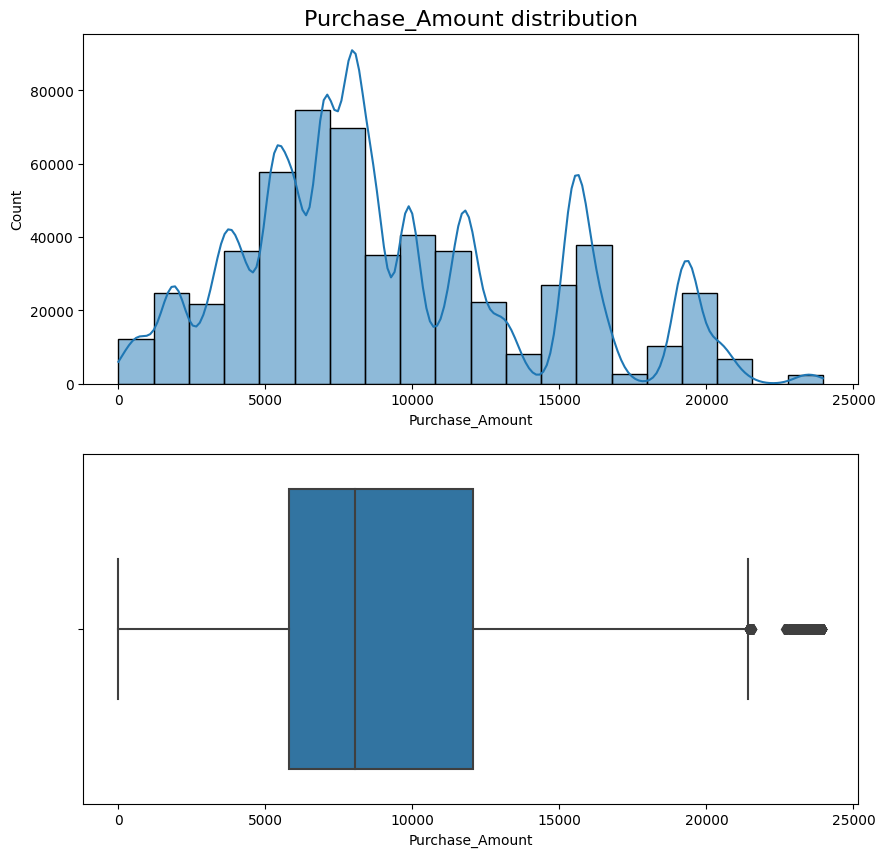

In [ ]:
fig, axis = plt.subplots(2,1, figsize=(10,10))
axis[0].set_title("Purchase_Amount distribution", fontsize=16)

plt.subplot(2,1,1)
sns.histplot(data=df, x = 'Purchase_Amount', kde = True, bins = 20)

plt.subplot(2,1,2)
sns.boxplot(data=df, x = 'Purchase_Amount')
plt.show()

**Calculating the number of Outliers in Purchase_Amount**

In [ ]:
Q3 = df['Purchase_Amount'].quantile(0.75)
Q2 = df['Purchase_Amount'].quantile(0.5)
Q1 = df['Purchase_Amount'].quantile(0.25)
IQR = Q3-Q1
print('Q1, Q2, Q3 =', [Q1,Q2,Q3])
print("IQR =",IQR)
minimum = np.min(df['Purchase_Amount'])
maximum =  Q3 +1.5* IQR
print('max,min =',[minimum,maximum])

Q1, Q2, Q3 = [5823.0, 8047.0, 12054.0]
IQR = 6231.0
max,min = [12, 21400.5]


In [ ]:
len(df.loc[df.Purchase_Amount > maximum, 'Purchase_Amount'])

2677

In [ ]:
outliers = 100*(2677/df.shape[0])
outliers

0.4866671029763593

**Insights :**
*    **Outliers** : There are 2677 outliers i.e., about 0.48% of the total data present in the Purchase_Amount column. These transactions are of super high Purchase_Amounts.

*    **Statistical Description** :
    *    The majority of the customer's Purchase amount is  between 5823 USD and 12054 USD.
    *    The median Purchase amount is 8047 USD.
    *    The lower limit is 12 USD and the upper limit is 21400 USD.

## Categorical Variables

In [ ]:
att = ['Gender', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years', 'Age']

for i in att:
    print(df[i].value_counts())
    print('-'*70)

Male      414259
Female    135809
Name: Gender, dtype: int64
----------------------------------------------------------------------
Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
----------------------------------------------------------------------
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
----------------------------------------------------------------------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
----------------------------------------------------------------------


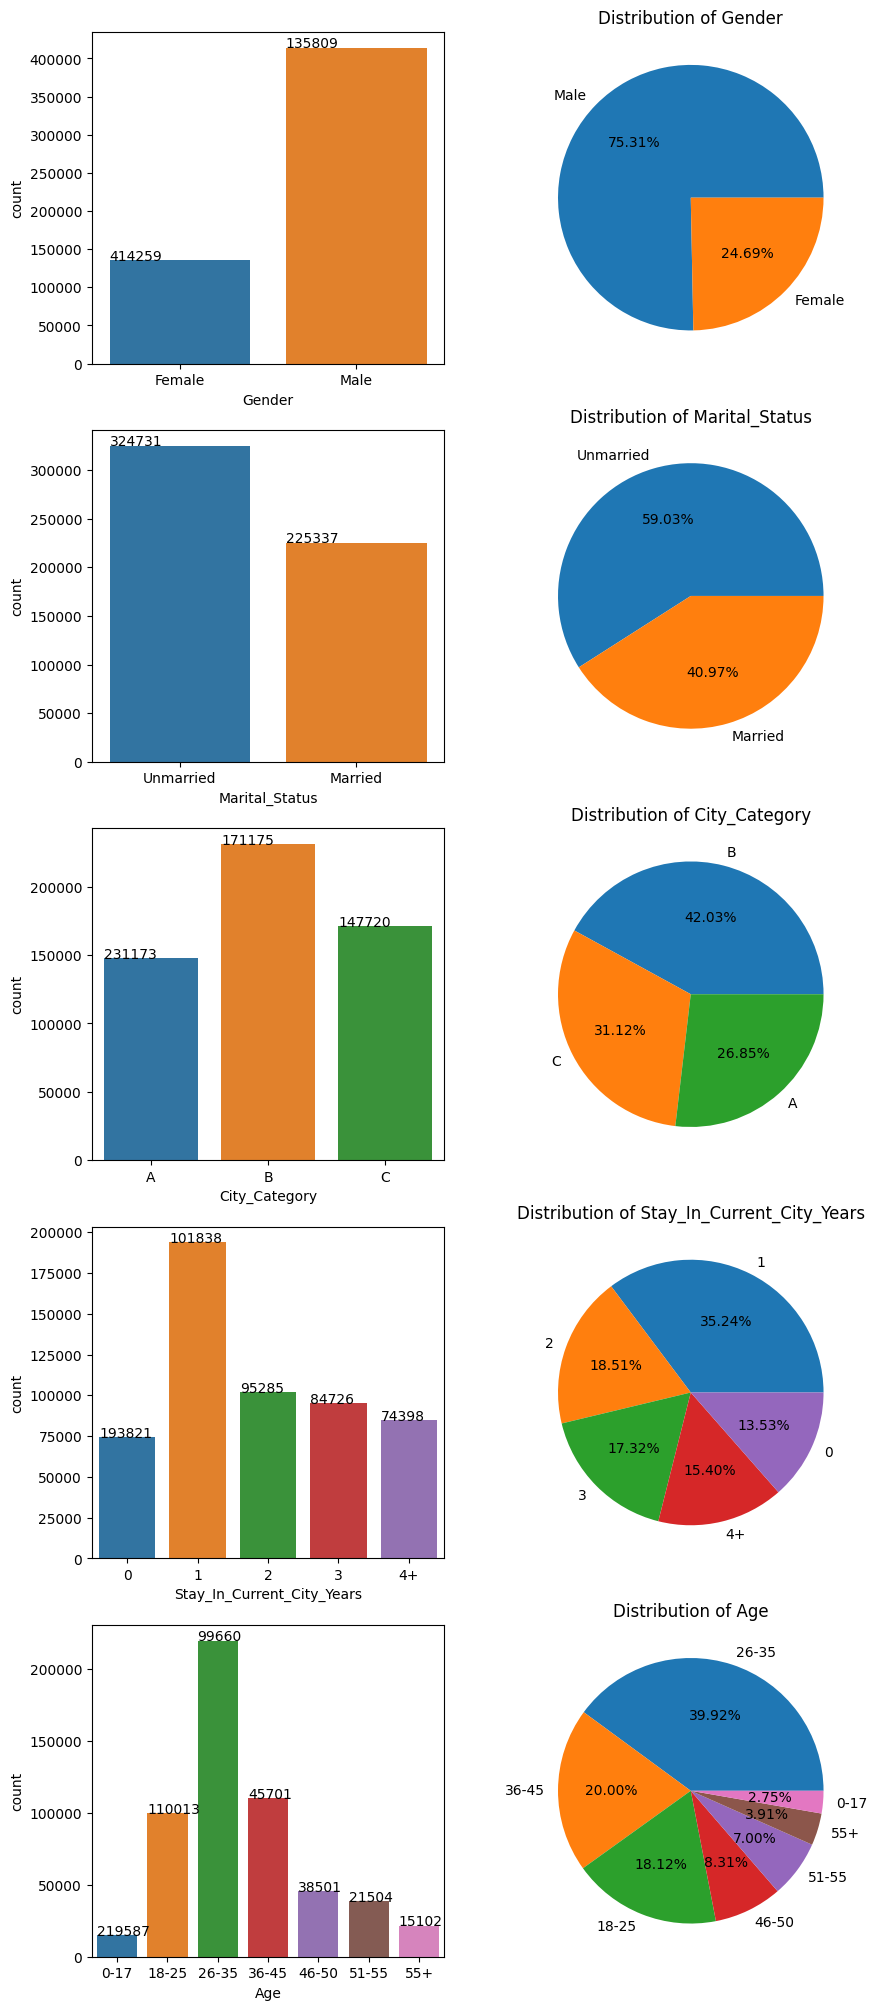

In [ ]:
fig, axis = plt.subplots(5,2, figsize=(10,25))

att = ['Gender', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years', 'Age']

c=0
for i in [1,3,5,7,9]:
    sns.color_palette("pastel")
    plt.subplot(5,2,i)
    ax = sns.countplot(data = df, x = att[c])

    for p, label in zip(ax.patches, df[att[c]].value_counts()):
         ax.annotate(label, (p.get_x(), p.get_height()+0.2))
    plt.subplot(5,2,i+1)
    plt.title(f'Distribution of {att[c]}')
    plt.pie(df[att[c]].value_counts(), labels = df[att[c]].value_counts().index, autopct ='%.02f%%' )
    c+=1

plt.show()

In [ ]:
df['Occupation'].value_counts().sort_values(ascending = False)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

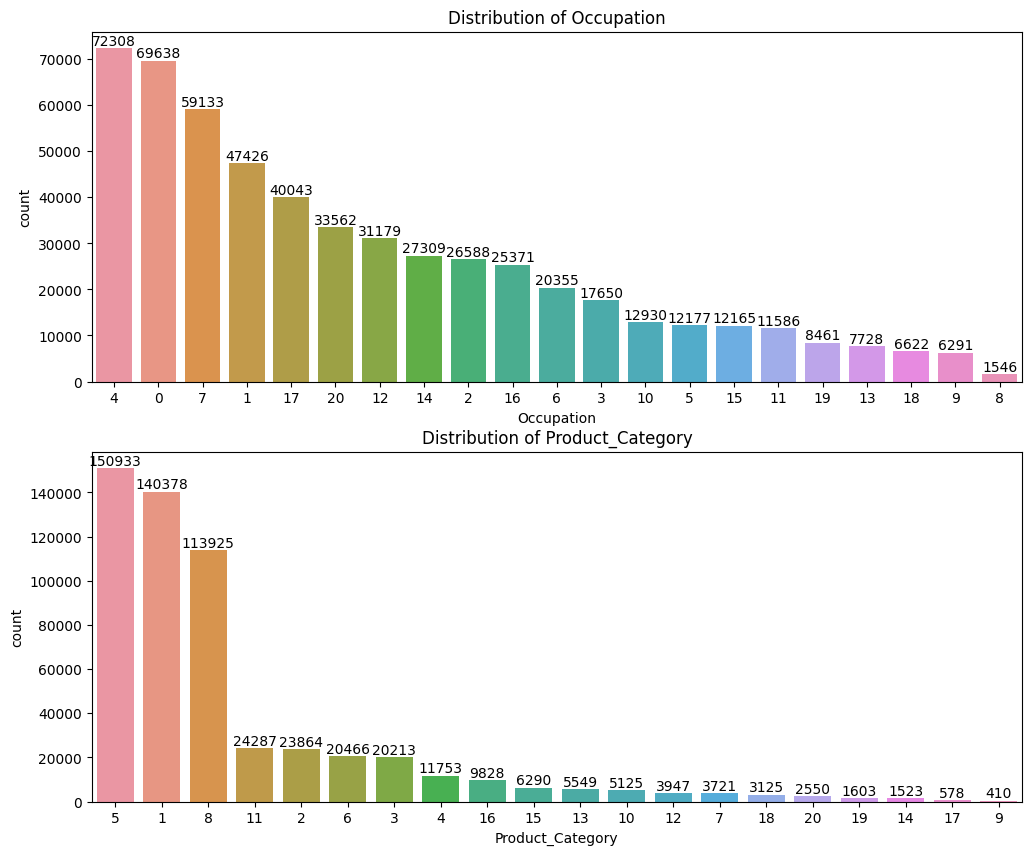

In [ ]:
fig, axis = plt.subplots(2,1, figsize=(12,10))

g = sns.countplot(data=df, x= 'Occupation', ax=axis[0], order = df['Occupation'].value_counts().index)
axis[0].set_title('Distribution of Occupation')
for i in g.containers:
    g.bar_label(i)

g = sns.countplot(data=df, x= 'Product_Category', ax=axis[1],order = df['Product_Category'].value_counts().index)
axis[1].set_title('Distribution of Product_Category')
for i in g.containers:
    g.bar_label(i)


plt.show()

**Top 10 most selling Product_ID**

In [ ]:
dfp = df['Product_ID'].value_counts()[:10].reset_index()
dfp

index  Product_ID
0  P00265242        1880
1  P00025442        1615
2  P00110742        1612
3  P00112142        1562
4  P00057642        1470
5  P00184942        1440
6  P00046742        1438
7  P00058042        1422
8  P00145042        1406
9  P00059442        1406

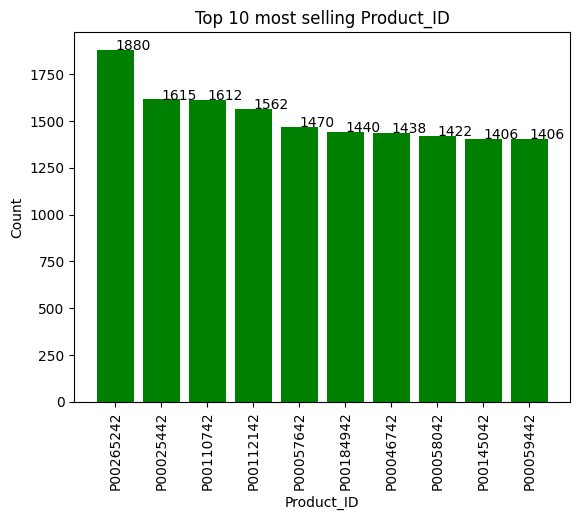

In [ ]:
plt.bar(dfp['index'], dfp['Product_ID'] ,color='g')
plt.xlabel('Product_ID')
plt.ylabel('Count')
plt.title('Top 10 most selling Product_ID')
plt.xticks(rotation=90)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(dfp['index'],dfp['Product_ID'])
plt.show()

**Insights :**

**1. Gender**

It is quite evident that about 75% of the customers are male and 25% are Female customers.

**2. Marital_Status**

It is significant that 59 % of the transactions were done by Unmarried customers. And 41 % of transactions were made by customers who are Married.

**3. City_Category**

We see a greater number of transactions were done by the customers from city B compared to the customers from cities A and C.

**4. Stay_In_Current_City_Years**

Most of the transactions are made by customers having a stay in the current city for 1 year and they account for a greater percentage compared to the customers having a stay for about 0, 2, 3, 4+ years in the current city.

**5. Age**

Around 40% of the transactions are dominantly made by customers falling in the age group of 26-35 years, while the customers of the age group 0-17 and 55+ ages have the lowest percentage of transactions made.

**6. Occupation**

The top 5 Occupation of the customers having a greater number of transactions are 4, 0, 7, 1, 17 (in descending order).

**7. Product_Category**

The Product_categories 5, 1, and 8 have significantly greater sales compared to the other product categories which have very low sales.

**8. Product_ID**
The above graph represents the top 10 most selling Product_IDs. It is observed that there is not much variance in the Product_ids.





# 2. Bivariant Analysis

<ipython-input-29-a4421086049c>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,3)


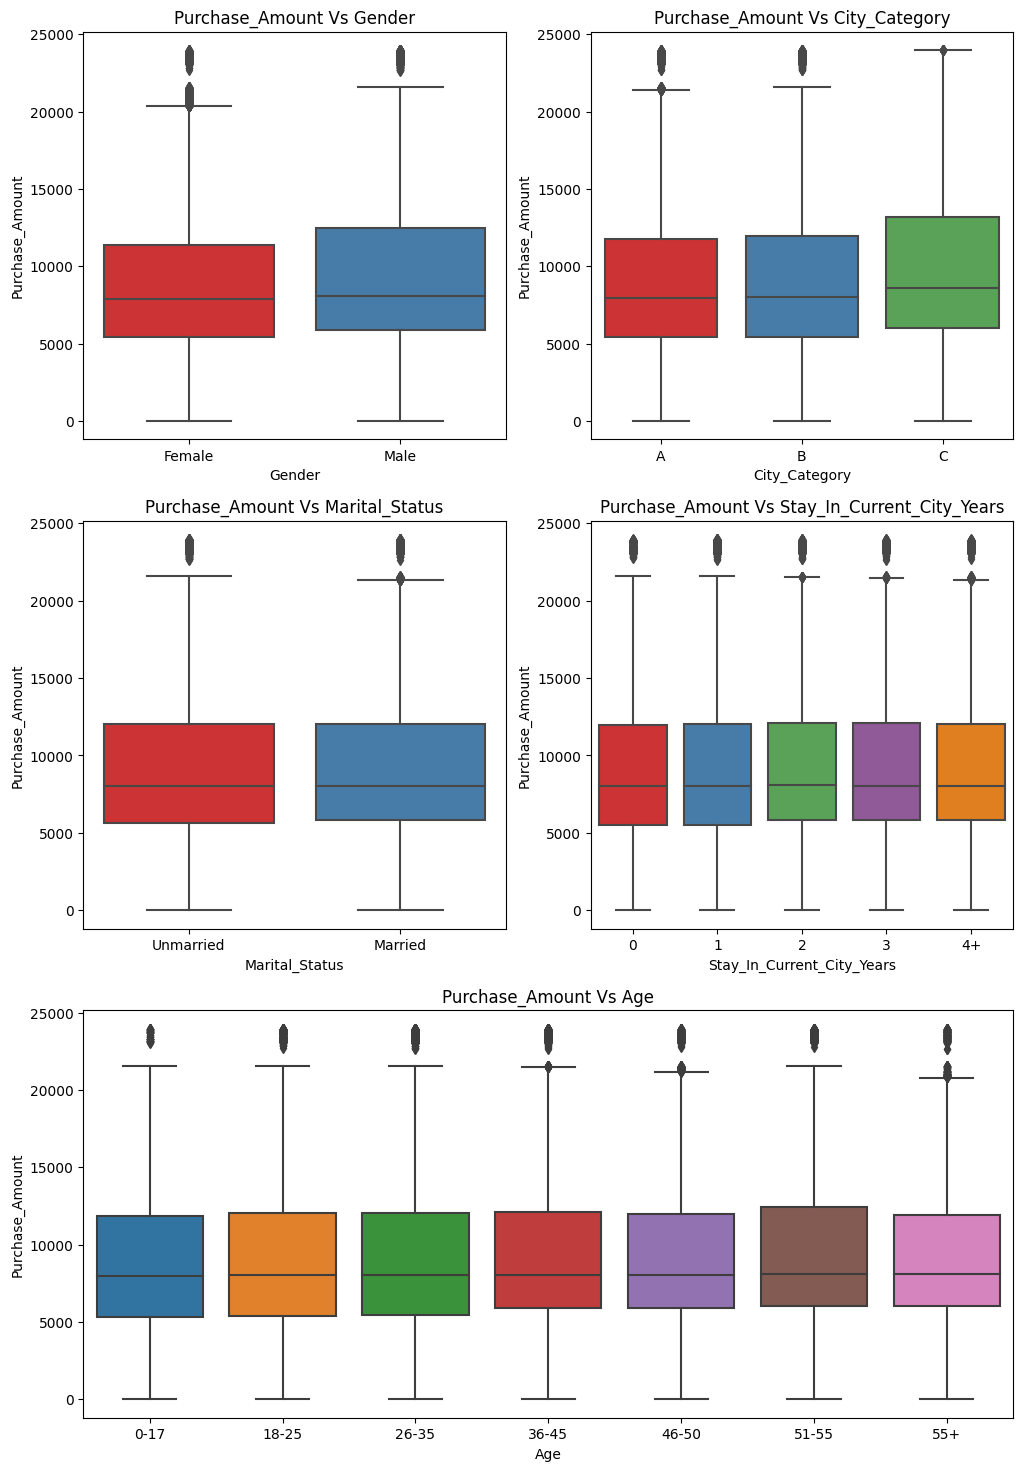

In [ ]:
fig, axis = plt.subplots(3,2, figsize=(12,18))

att = ['Gender','City_Category', 'Marital_Status', 'Stay_In_Current_City_Years']
for i in range(len(att)):
    plt.subplot(3,2,i+1)
    plt.title(f'Purchase_Amount Vs {att[i]}')
    sns.boxplot(data=df, y = 'Purchase_Amount', x = att[i], palette = "Set1")

plt.subplot(3,1,3)
plt.title('Purchase_Amount Vs Age')
sns.boxplot(data=df, y = 'Purchase_Amount', x = 'Age')
plt.show()

**Insights :**

*   From the bivariant analysis, in all the plots above the Purchase_Amount accross these variables ramain very stable irrespective of the variables.


*   It is also observed that the median remains almost same accros various categories regardless of the attributes that are considered.

# 3. Multivariant Analysis

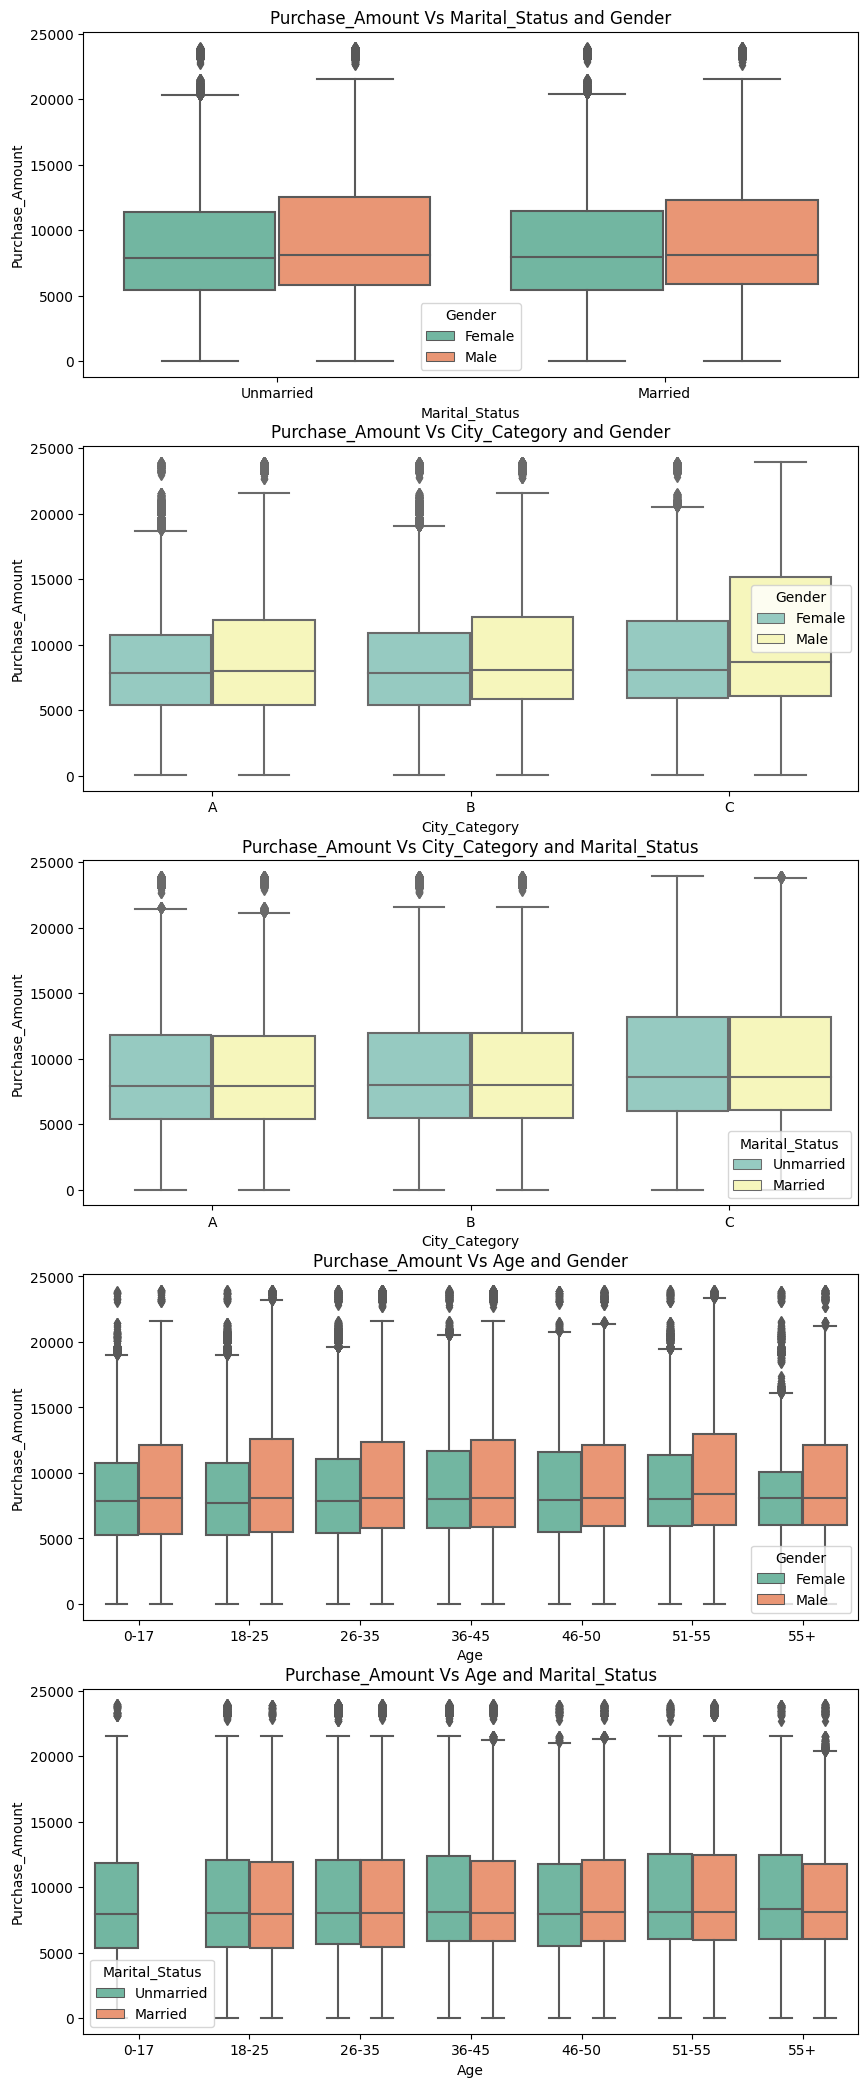

In [ ]:
fig, axis = plt.subplots(5,1, figsize=(10,26))

sns.boxplot(data=df, y = 'Purchase_Amount', x = 'Marital_Status', hue = 'Gender', ax=axis[0], palette='Set2')
axis[0].set_title("Purchase_Amount Vs Marital_Status and Gender")
sns.boxplot(data=df, y = 'Purchase_Amount', x = 'City_Category', hue = 'Gender', ax= axis[1], palette = 'Set3')
axis[1].set_title("Purchase_Amount Vs City_Category and Gender")
sns.boxplot(data=df, y = 'Purchase_Amount', x = 'City_Category', hue = 'Marital_Status', ax= axis[2], palette = 'Set3')
axis[2].set_title("Purchase_Amount Vs City_Category and Marital_Status")
sns.boxplot(data=df, y = 'Purchase_Amount', x = 'Age', hue = 'Gender', ax= axis[3], palette = 'Set2')
axis[3].set_title("Purchase_Amount Vs Age and Gender")
sns.boxplot(data=df, y = 'Purchase_Amount', x = 'Age', hue = 'Marital_Status', ax= axis[4], palette = 'Set2')
axis[4].set_title("Purchase_Amount Vs Age and Marital_Status")

plt.show()

**Insights :**

*   It is very much noted that in the above graphs, it is Male Customers who do more number of transactions than Female Customers, regardless of the attributes under consideration.

*   It is evident that the mean remains the same for Married and Unmarried Customers regardless of the attributes under consideration. Hence there is no statistically significant effect of the customers Marital Status for the transactions they do.

In [ ]:
df.corr()    # As there is only one numerical attribute in the given data

<ipython-input-31-14dd188e4bf7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()    # As there is only one numerical attribute in the given data


Purchase_Amount
Purchase_Amount              1.0

**As the data contains only 1 Numerical attribute - Purchase_Amount, there is no point in checking the correlation.**

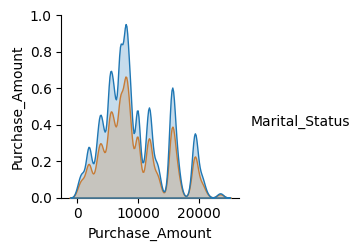

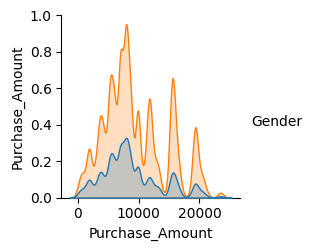

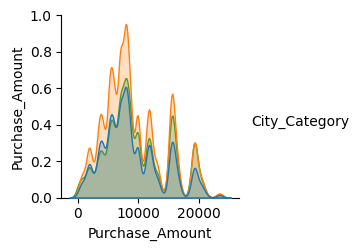

In [ ]:
sns.pairplot(df,hue ='Marital_Status')
sns.pairplot(df,hue ='Gender')
sns.pairplot(df,hue ='City_Category')
plt.show()

# Central Limit Theorem

In [ ]:
df.describe()

Purchase_Amount
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000

# 1. Gender Vs Purchase_Amount

In [ ]:
df_gen = df.groupby('Gender')['Purchase_Amount'].describe().T
df_gen

Gender         Female          Male
count   135809.000000  414259.00000
mean      8734.565765    9437.52604
std       4767.233289    5092.18621
min         12.000000      12.00000
25%       5433.000000    5863.00000
50%       7914.000000    8098.00000
75%      11400.000000   12454.00000
max      23959.000000   23961.00000

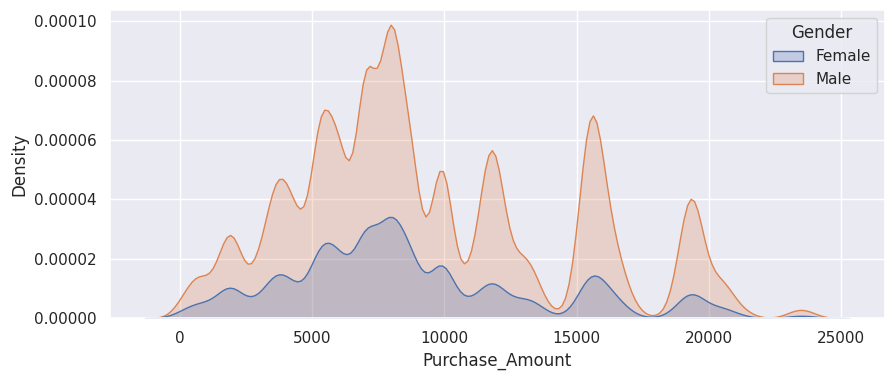

In [ ]:
sns.set(rc={"figure.figsize":(10,4)})
sns.kdeplot(df,x = 'Purchase_Amount',hue='Gender', fill=True)
plt.show()

**Insights :**

**1. Average Transaction Value**

*   The average transaction for Male = 9435 USD
*   The average transaction for Female = 8735 USD
*   The mean transaction is greater for Male than Female customers.

**2. Standard Deviation**

*   The std for Male = 5092 USD
*   The std for Female = 4767 USD
*   The spread is greater for Male than Female customers.

## Bootstrapping for Gender column

In [ ]:
df_male = df.loc[df['Gender']=='Male','Purchase_Amount']
df_female = df.loc[df['Gender']=='Female', 'Purchase_Amount']

In [ ]:
def bootstrapping(male, female, sample_size, itr_size,ci):

    male_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_male, sample_size)) for j in range(itr_size)]

    female_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_female, sample_size)) for j in range(itr_size)]

    sample_mean_m = np.mean(male_bootstrapped_sample_means_list).round(2)
    sample_mean_f = np.mean(female_bootstrapped_sample_means_list).round(2)

    stderr_m = np.std(male_bootstrapped_sample_means_list).round(2)
    stderr_f = np.std(female_bootstrapped_sample_means_list).round(2)

    c = ci/100
    lower_limit_m = (norm.ppf((1-c)/2)*stderr_m + sample_mean_m).round(2)
    upper_limit_m = (norm.ppf(c + ((1-c)/2))*stderr_m + sample_mean_m).round(2)

    lower_limit_f = (norm.ppf((1-c)/2)*stderr_f + sample_mean_f).round(2)
    upper_limit_f = (norm.ppf(c + ((1-c)/2))*stderr_f + sample_mean_f).round(2)

    plt.figure(figsize=(10,6))
    plt.suptitle(f'{ci}% Confidence Interval, sample_size ={sample_size}', fontsize=16)
    sns.kdeplot(data = male_bootstrapped_sample_means_list, fill=True, label ='Male')
    plt.title(f'sample_mean_male = {sample_mean_m} , sample_mean_female = {sample_mean_f} , CI_male =[{lower_limit_m} , {upper_limit_m}] , CI_female= [{lower_limit_f} , {upper_limit_f}]',fontsize=10)
    sns.kdeplot(data = female_bootstrapped_sample_means_list, fill=True, label ='Female')
    plt.axvline(lower_limit_m,0,1, color ='red', linestyle ='--' )
    plt.axvline(upper_limit_m,0,1, color ='red', linestyle ='--' )
    plt.axvline(lower_limit_f,0,1, color ='blue', linestyle ='--' )
    plt.axvline(upper_limit_f,0,1, color ='blue', linestyle ='--')
    plt.axvline(sample_mean_m,0,1, color ='red' )
    plt.axvline(sample_mean_f,0,1, color ='blue' )
    plt.legend()

    plt.show()
    m_df = [sample_size,sample_mean_m, stderr_m, lower_limit_m, upper_limit_m]
    f_df = [sample_size,sample_mean_f, stderr_f, lower_limit_f, upper_limit_f]

    return [m_df , f_df]

## 90% Confidence Interval

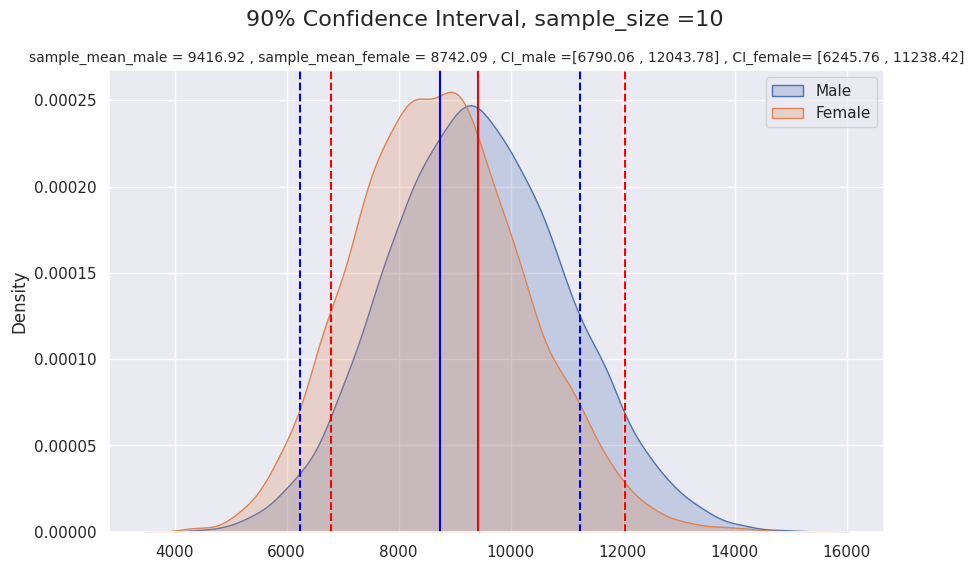

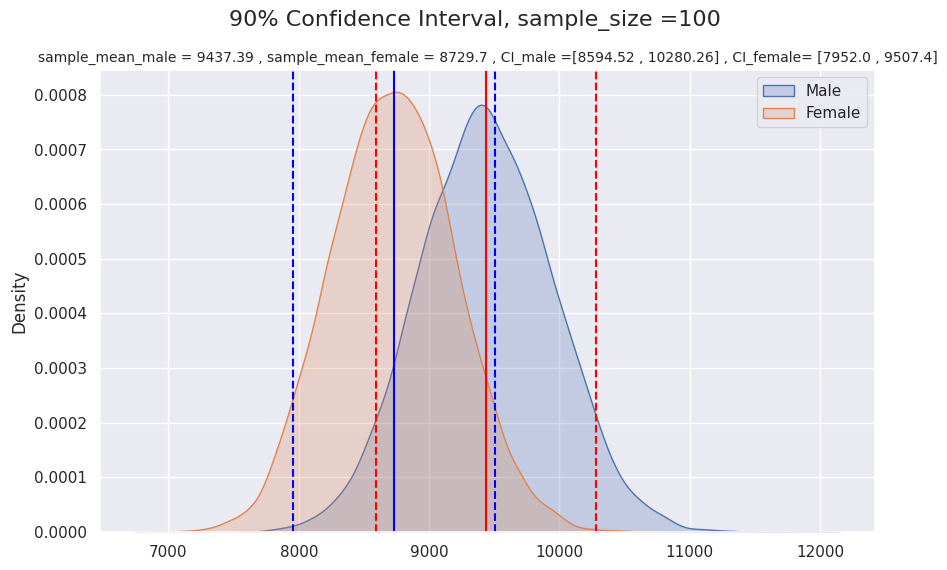

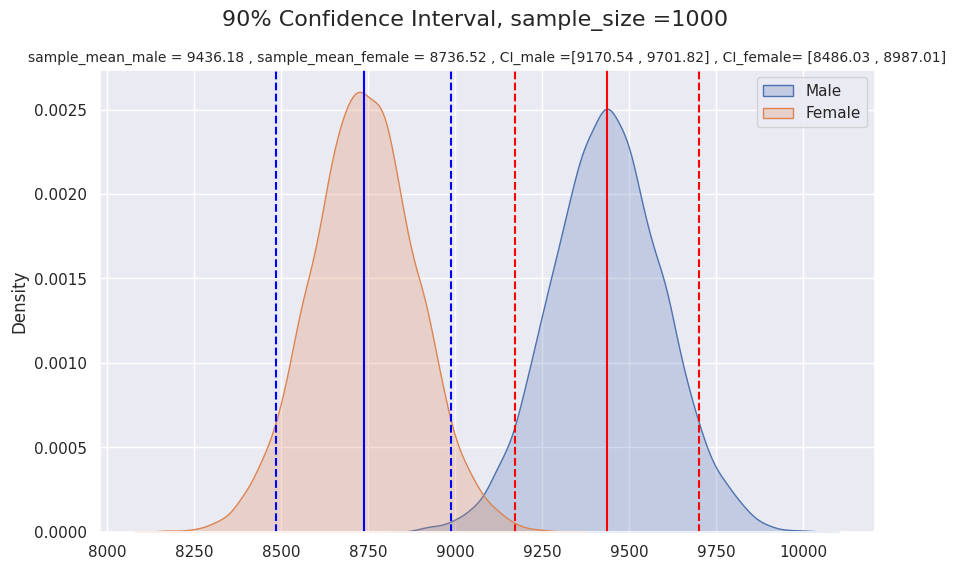

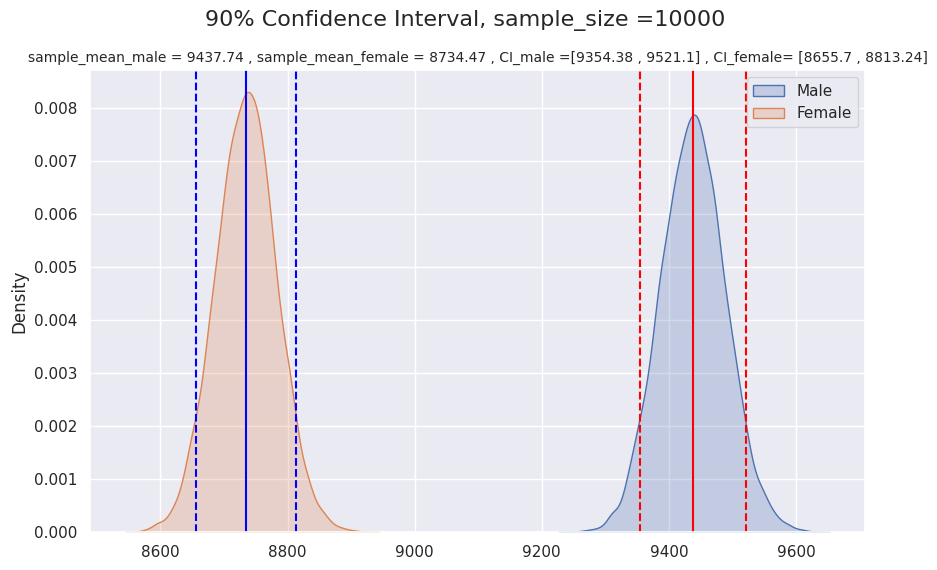

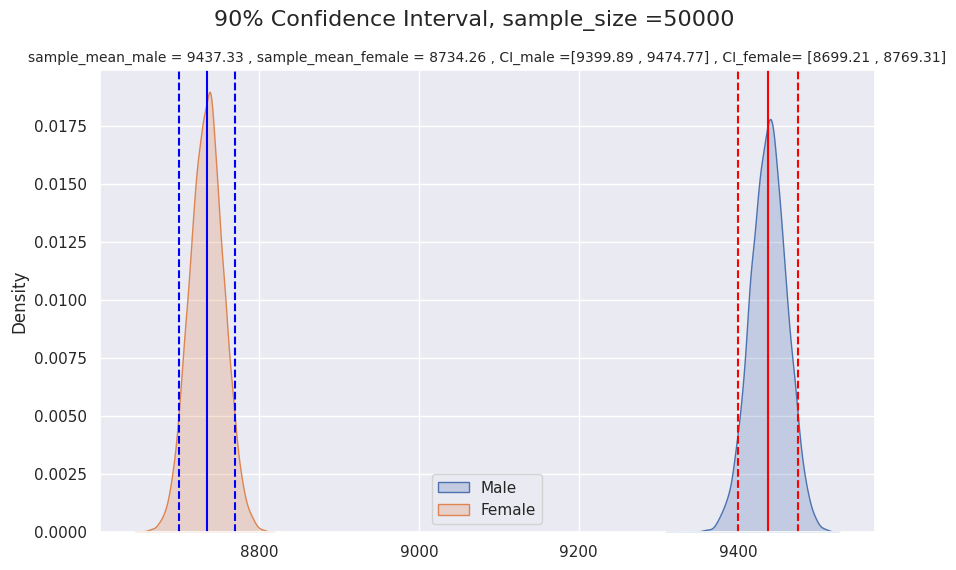

In [ ]:
ci = 90
sample_size =[10, 100, 1000, 10000, 50000]
itr_size = 10000
male=[]
female=[]

for i in sample_size:
    m ,f  = bootstrapping(df_male,df_female,i, itr_size, ci)
    male.extend([m])
    female.extend([f])

In [ ]:
m_df = pd.DataFrame(male,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
m_df['Range'] = m_df['upper_limit'] - m_df['lower_limit']
m_df['90 % CI'] = '['+m_df['lower_limit'].astype('str')+' , '+m_df['upper_limit'].astype('str')+']'
m_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
m_df['Gender'] = ['Male']*5
m_df.set_index('Gender').T

Gender                       Male                  Male                 Male  \
Sample_size                    10                   100                 1000   
Sample_mean               9416.92               9437.39              9436.18   
std_err                   1597.02                512.43                161.5   
Range                     5253.72               1685.74               531.28   
90 % CI      [6790.06 , 12043.78]  [8594.52 , 10280.26]  [9170.54 , 9701.82]   

Gender                     Male                 Male  
Sample_size               10000                50000  
Sample_mean             9437.74              9437.33  
std_err                   50.68                22.76  
Range                    166.72                74.88  
90 % CI      [9354.38 , 9521.1]  [9399.89 , 9474.77]

In [ ]:
f_df = pd.DataFrame(female,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
f_df['Range'] = f_df['upper_limit'] - f_df['lower_limit']
f_df['90 % CI'] = '['+f_df['lower_limit'].astype('str')+' , '+f_df['upper_limit'].astype('str')+']'
f_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
f_df['Gender'] = ['Female']*5
f_df.set_index('Gender').T

Gender                     Female             Female               Female  \
Sample_size                    10                100                 1000   
Sample_mean               8742.09             8729.7              8736.52   
std_err                   1517.66             472.81               152.29   
Range                     4992.66             1555.4               500.98   
90 % CI      [6245.76 , 11238.42]  [7952.0 , 9507.4]  [8486.03 , 8987.01]   

Gender                   Female               Female  
Sample_size               10000                50000  
Sample_mean             8734.47              8734.26  
std_err                   47.89                21.31  
Range                    157.54                 70.1  
90 % CI      [8655.7 , 8813.24]  [8699.21 , 8769.31]

## 95% Confidence Interval

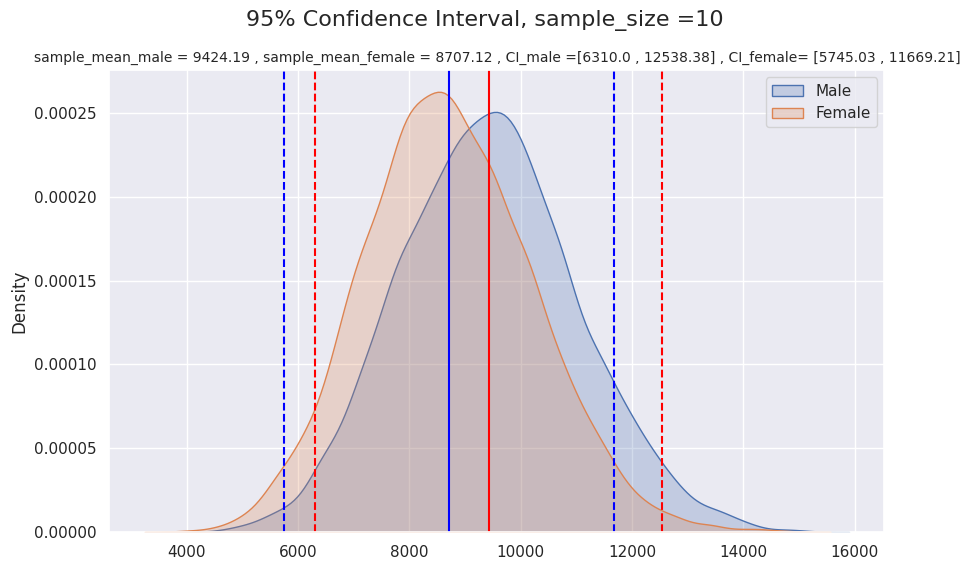

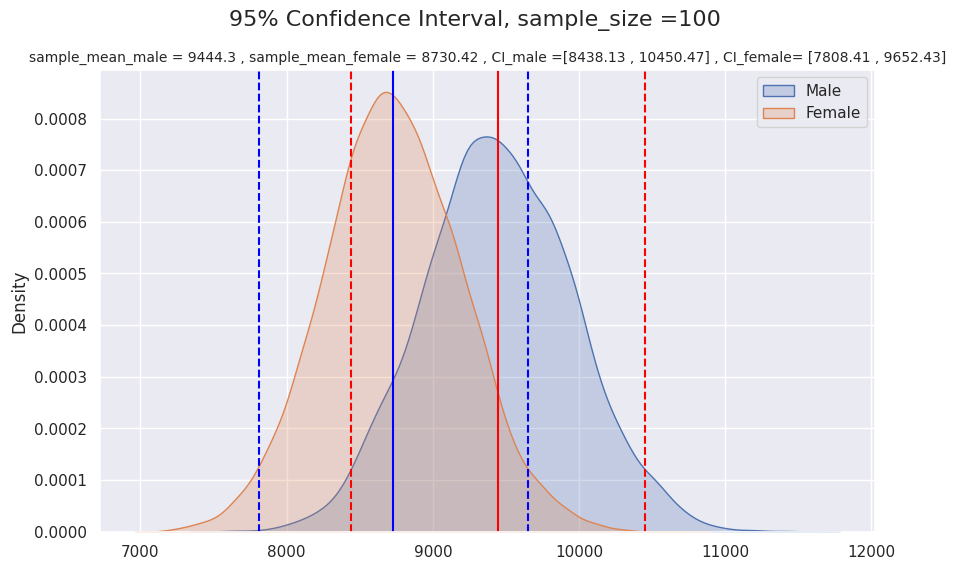

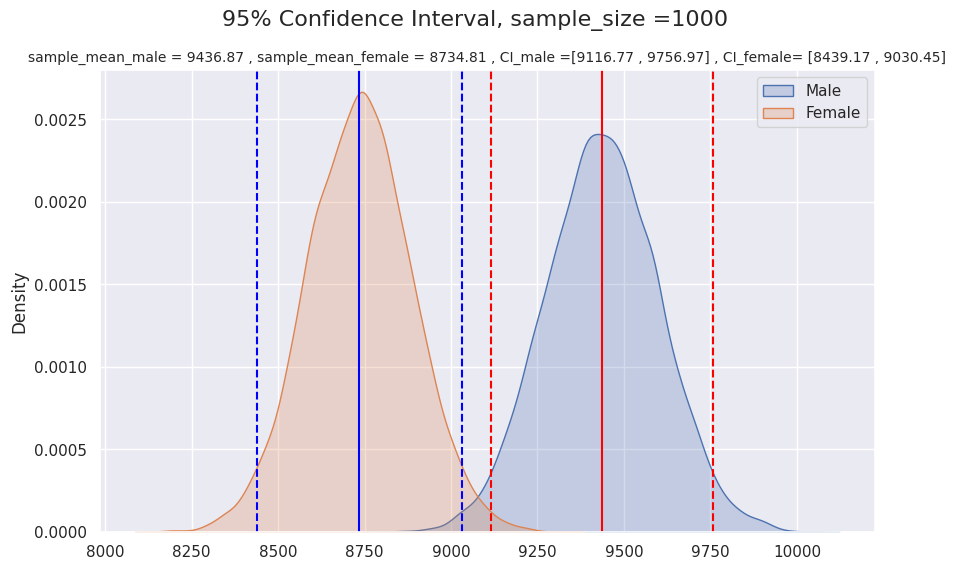

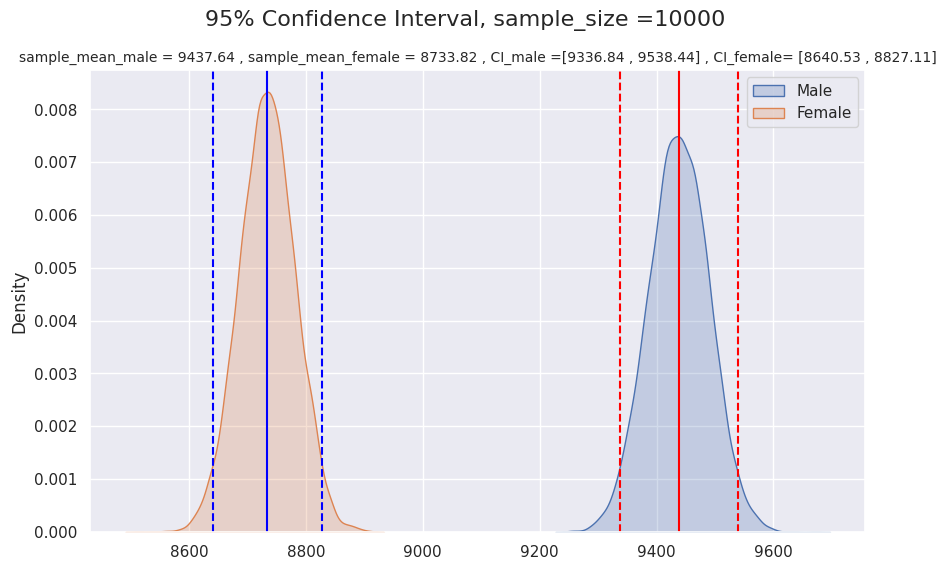

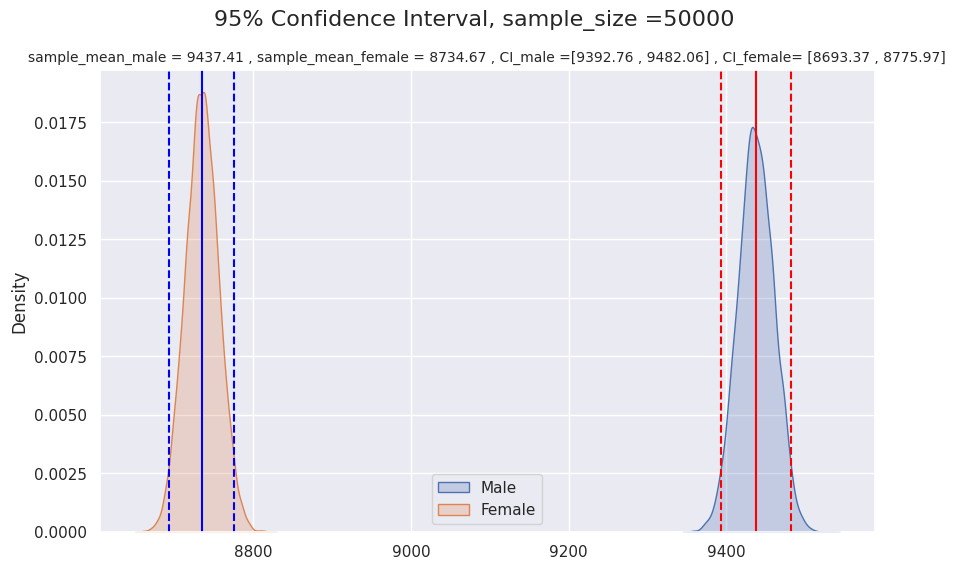

In [ ]:
ci = 95
sample_size =[10, 100, 1000, 10000, 50000]
itr_size = 10000
male=[]
female=[]

for i in sample_size:
    m ,f  = bootstrapping(df_male,df_female,i, itr_size, ci)
    male.extend([m])
    female.extend([f])

In [ ]:
m_df = pd.DataFrame(male,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
m_df['Range'] = m_df['upper_limit'] - m_df['lower_limit']
m_df['95 % CI'] = '['+m_df['lower_limit'].astype('str')+' , '+m_df['upper_limit'].astype('str')+']'
m_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
m_df['Gender'] = ['Male']*5
m_df.set_index('Gender').T

Gender                      Male                  Male                 Male  \
Sample_size                   10                   100                 1000   
Sample_mean              9424.19                9444.3              9436.87   
std_err                   1588.9                513.36               163.32   
Range                    6228.38               2012.34                640.2   
95 % CI      [6310.0 , 12538.38]  [8438.13 , 10450.47]  [9116.77 , 9756.97]   

Gender                      Male                 Male  
Sample_size                10000                50000  
Sample_mean              9437.64              9437.41  
std_err                    51.43                22.78  
Range                      201.6                 89.3  
95 % CI      [9336.84 , 9538.44]  [9392.76 , 9482.06]

In [ ]:
f_df = pd.DataFrame(female,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
f_df['Range'] = f_df['upper_limit'] - f_df['lower_limit']
f_df['95 % CI'] = '['+f_df['lower_limit'].astype('str')+' , '+f_df['upper_limit'].astype('str')+']'
f_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
f_df['Gender'] = ['Female']*5
f_df.set_index('Gender').T

Gender                     Female               Female               Female  \
Sample_size                    10                  100                 1000   
Sample_mean               8707.12              8730.42              8734.81   
std_err                    1511.3               470.42               150.84   
Range                     5924.18              1844.02               591.28   
95 % CI      [5745.03 , 11669.21]  [7808.41 , 9652.43]  [8439.17 , 9030.45]   

Gender                    Female               Female  
Sample_size                10000                50000  
Sample_mean              8733.82              8734.67  
std_err                     47.6                21.07  
Range                     186.58                 82.6  
95 % CI      [8640.53 , 8827.11]  [8693.37 , 8775.97]

## 99% Confidence Interval

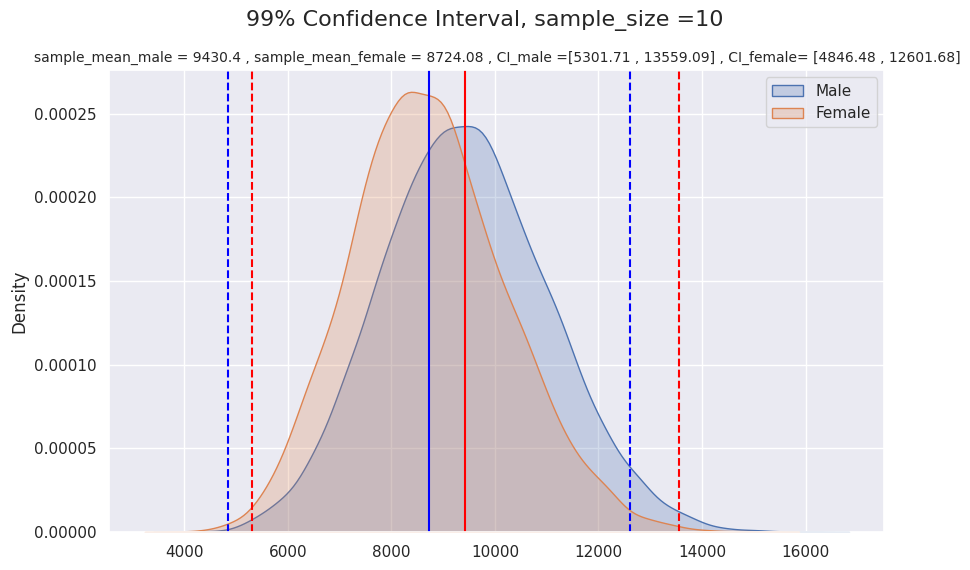

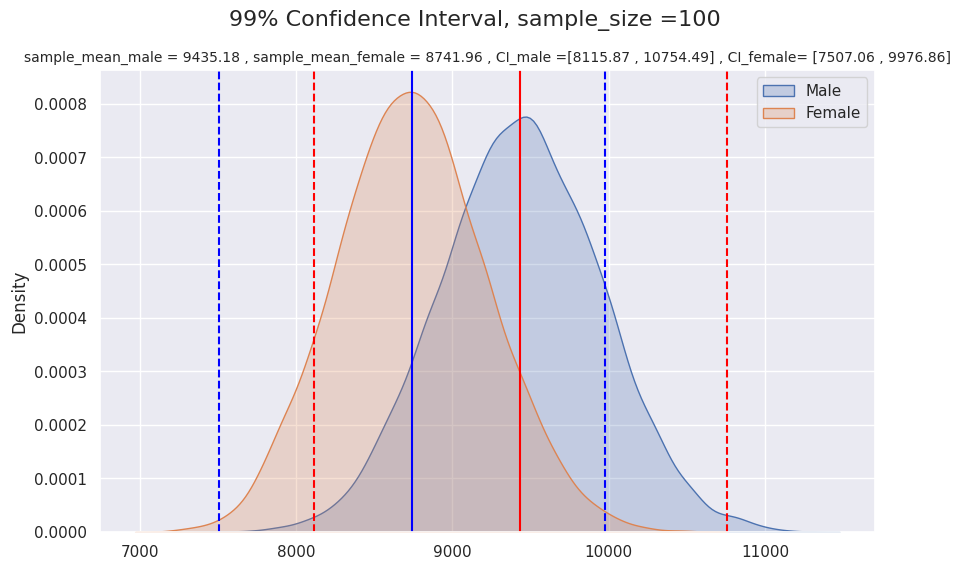

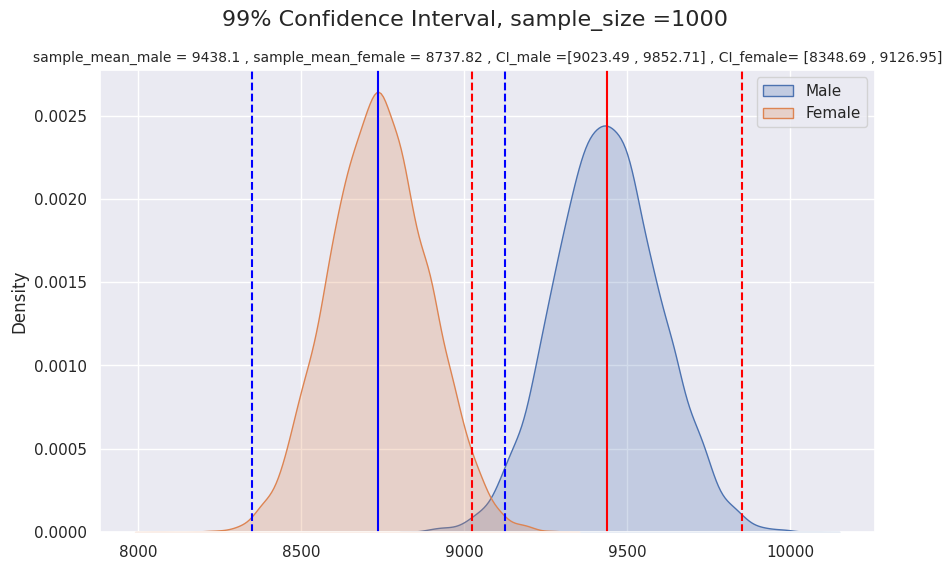

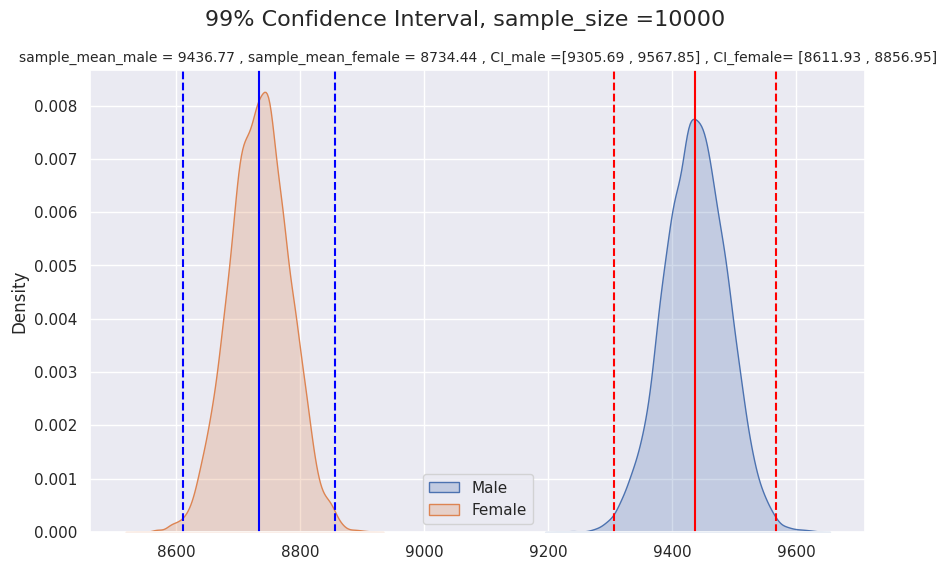

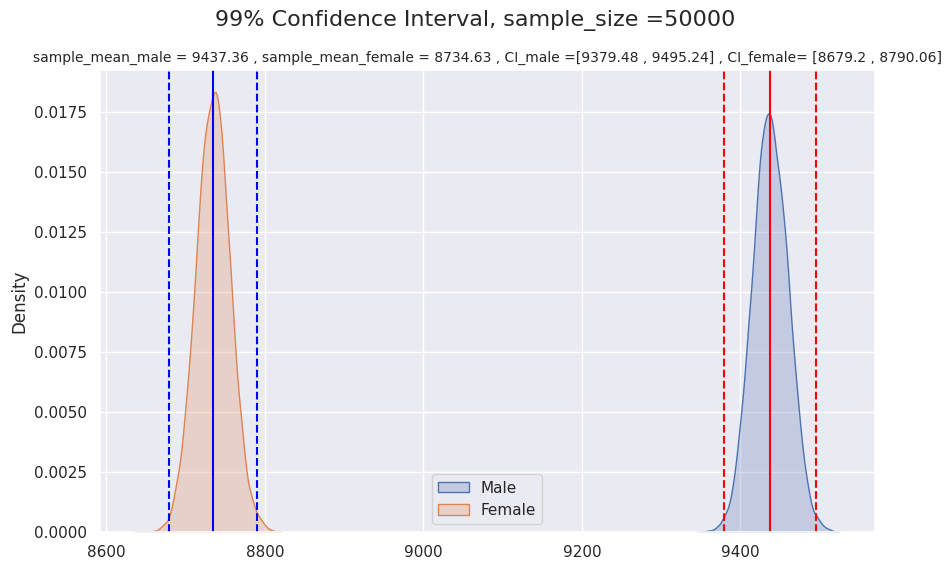

In [ ]:
ci = 99
sample_size =[10, 100, 1000, 10000, 50000]
itr_size = 10000
male=[]
female=[]

for i in sample_size:
    m ,f  = bootstrapping(df_male,df_female,i, itr_size, ci)
    male.extend([m])
    female.extend([f])

In [ ]:
m_df = pd.DataFrame(male,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
m_df['Range'] = m_df['upper_limit'] - m_df['lower_limit']
m_df['99 % CI'] = '['+m_df['lower_limit'].astype('str')+' , '+m_df['upper_limit'].astype('str')+']'
m_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
m_df['Gender'] = ['Male']*5
m_df.set_index('Gender').T

Gender                       Male                  Male                 Male  \
Sample_size                    10                   100                 1000   
Sample_mean                9430.4               9435.18               9438.1   
std_err                   1602.86                512.19               160.96   
Range                     8257.38               2638.62               829.22   
99 % CI      [5301.71 , 13559.09]  [8115.87 , 10754.49]  [9023.49 , 9852.71]   

Gender                      Male                 Male  
Sample_size                10000                50000  
Sample_mean              9436.77              9437.36  
std_err                    50.89                22.47  
Range                     262.16               115.76  
99 % CI      [9305.69 , 9567.85]  [9379.48 , 9495.24]

In [ ]:
f_df = pd.DataFrame(female,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
f_df['Range'] = f_df['upper_limit'] - f_df['lower_limit']
f_df['99 % CI'] = '['+f_df['lower_limit'].astype('str')+' , '+f_df['upper_limit'].astype('str')+']'
f_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
f_df['Gender'] = ['Female']*5
f_df.set_index('Gender').T

Gender                     Female               Female               Female  \
Sample_size                    10                  100                 1000   
Sample_mean               8724.08              8741.96              8737.82   
std_err                   1505.38               479.42               151.07   
Range                      7755.2               2469.8               778.26   
99 % CI      [4846.48 , 12601.68]  [7507.06 , 9976.86]  [8348.69 , 9126.95]   

Gender                    Female              Female  
Sample_size                10000               50000  
Sample_mean              8734.44             8734.63  
std_err                    47.56               21.52  
Range                     245.02              110.86  
99 % CI      [8611.93 , 8856.95]  [8679.2 , 8790.06]

**Insights :**

**1. Sample size**

*   From the analysis, it is evident that as the sample size increases, the Confidence Interval becomes more and more narrow and precise.
*   Hence it is proven that, the larger the sample size taken more precise the insights and recommendations can be given.

**2. Confidence Interval**

*   It is observed that for sample size = 10 and 100, the two curves are ovrelapped and hence the Confidence Interval overlapped too.
*   For the sample sizes 1000 and above the two curves are well separeated and do not overlap, so as the Confidence Intervals.
*   The higher is the sample size taken, more narrow and precise is the Confidence Intervals.

*   With 90% CI -

   Male = [9401 , 9474] and  Female = [8699 , 8770]

*   With 95% CI -

   Male = [9393 , 9482] and Female = [8693, 8776]

*   With 99% CI -

   Male = [9380 , 9496] and Female = [8879 , 8790]

**3. Population Mean and Average of Sample Means**

*   It is already found that the pop mean for Male and Female is 9435 and 8735 respectively.

*   With 90% Mean of sample means -

   Male = 9438 and  Female = 8734

*   With 95% Mean of sample means -

   Male = 9437 and  Female = 8734

*   With 99% Mean of sample means -

   Male = 9437 and  Female = 8735

*   Hence Population mean ~= Average of ample means


**4. Expencesby Female Vs Male**

*   It is most evident that Males spend more than Females per transaction and the average transactions done by Female customers is less than Male customers.

# 2. Marital_Status Vs Purchase_Amount

In [ ]:
df_ms = df.groupby('Marital_Status')['Purchase_Amount'].describe().T
df_ms

Marital_Status      Unmarried        Married
count           324731.000000  225337.000000
mean              9265.907619    9261.174574
std               5027.347859    5016.897378
min                 12.000000      12.000000
25%               5605.000000    5843.000000
50%               8044.000000    8051.000000
75%              12061.000000   12042.000000
max              23961.000000   23961.000000

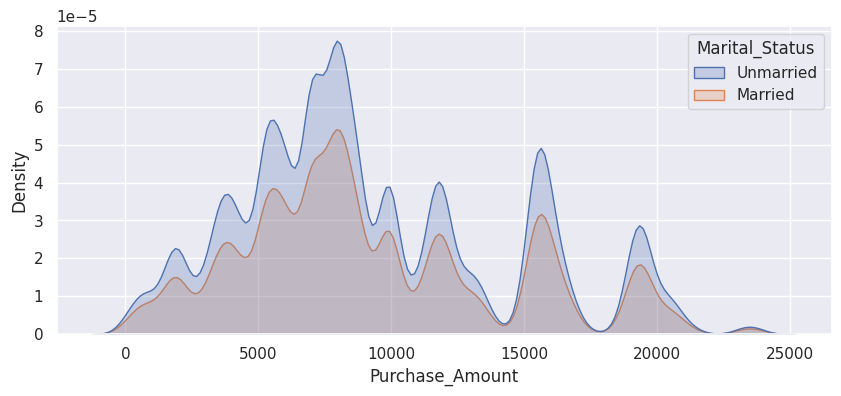

In [ ]:
sns.set(rc={"figure.figsize":(10,4)})
sns.kdeplot(df,x = 'Purchase_Amount',hue='Marital_Status', fill=True)
plt.show()

**Insights :**

**1. Average Transaction Value**

*   The average transaction for Married = 9261 USD
*   The average transaction for Unmarried = 9266 USD
*   The mean transaction is greater for Unmarried than Married customers.

**2. Standard Deviation**

*   The std for Married = 5017 USD
*   The std for Unmarried = 5027 USD
*   The spread is greater for Unmarried than Married customers.

## Bootstrapping for Marital_Status column

In [ ]:
df_mar = df.loc[df['Marital_Status']=='Married','Purchase_Amount']
df_unmar = df.loc[df['Marital_Status']=='Unmarried', 'Purchase_Amount']

In [ ]:
def bootstrapping2(df_mar, df_unmar, sample_size, itr_size,ci):

    mar_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_mar, sample_size)) for j in range(itr_size)]

    unmar_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_unmar, sample_size)) for j in range(itr_size)]

    sample_mean_mar = np.mean(mar_bootstrapped_sample_means_list).round(2)
    sample_mean_unmar = np.mean(unmar_bootstrapped_sample_means_list).round(2)

    sde_mar = np.std(mar_bootstrapped_sample_means_list).round(2)
    sde_unmar = np.std(unmar_bootstrapped_sample_means_list).round(2)

    c = ci/100
    ll_mar = (norm.ppf((1-c)/2)*sde_mar + sample_mean_mar).round(2)
    ul_mar = (norm.ppf(c + ((1-c)/2))*sde_mar + sample_mean_mar).round(2)

    ll_unmar = (norm.ppf((1-c)/2)*sde_unmar + sample_mean_unmar).round(2)
    ul_unmar = (norm.ppf(c + ((1-c)/2))*sde_unmar + sample_mean_unmar).round(2)

    plt.figure(figsize=(10,6))
    plt.suptitle(f'{ci}% Confidence Interval, sample_size ={sample_size}', fontsize=16)
    sns.kdeplot(data = mar_bootstrapped_sample_means_list, fill=True, label ='Married')
    plt.title(f'sample_mean_married = {sample_mean_mar} , sample_mean_unmar = {sample_mean_unmar} , CI_married = [{ul_mar} , {ll_mar}] , CI_unmarried= [{ul_unmar} , {ll_unmar}]',fontsize=10)
    sns.kdeplot(data = unmar_bootstrapped_sample_means_list, fill=True, label ='Unmarried')
    plt.axvline(ll_mar,0,1, color ='red', linestyle ='--' )
    plt.axvline(ul_mar,0,1, color ='red', linestyle ='--' )
    plt.axvline(ll_unmar,0,1, color ='blue', linestyle ='--' )
    plt.axvline(ul_unmar,0,1, color ='blue', linestyle ='--')
    plt.axvline(sample_mean_mar,0,1, color ='red' )
    plt.axvline(sample_mean_unmar,0,1, color ='blue' )
    plt.legend()

    plt.show()
    mar_df = [sample_size,sample_mean_mar, sde_mar, ll_mar, ul_mar]
    unmar_df = [sample_size,sample_mean_unmar, sde_unmar, ll_unmar, ul_unmar]

    return [mar_df , unmar_df]

## 90% Confidence Internval

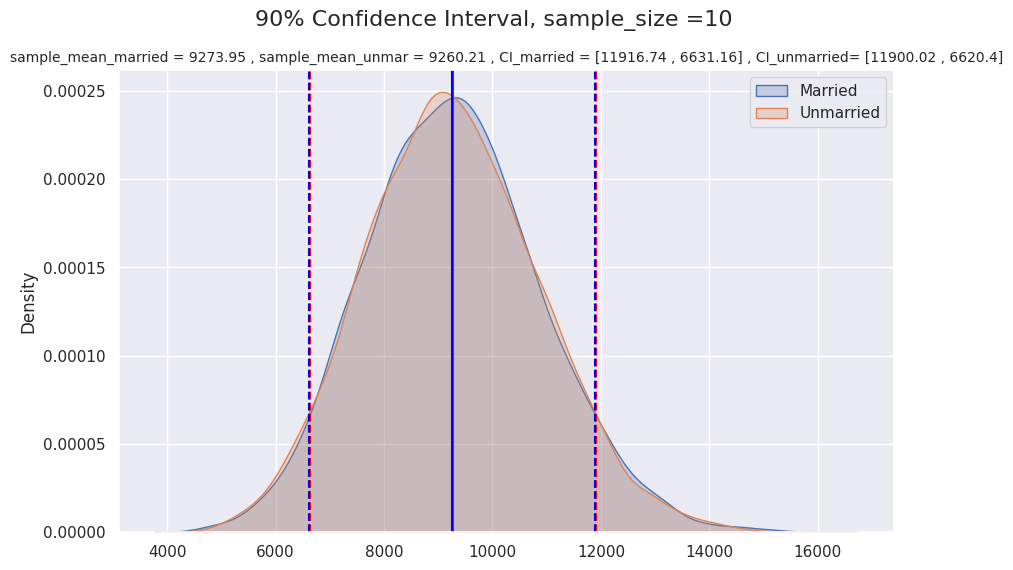

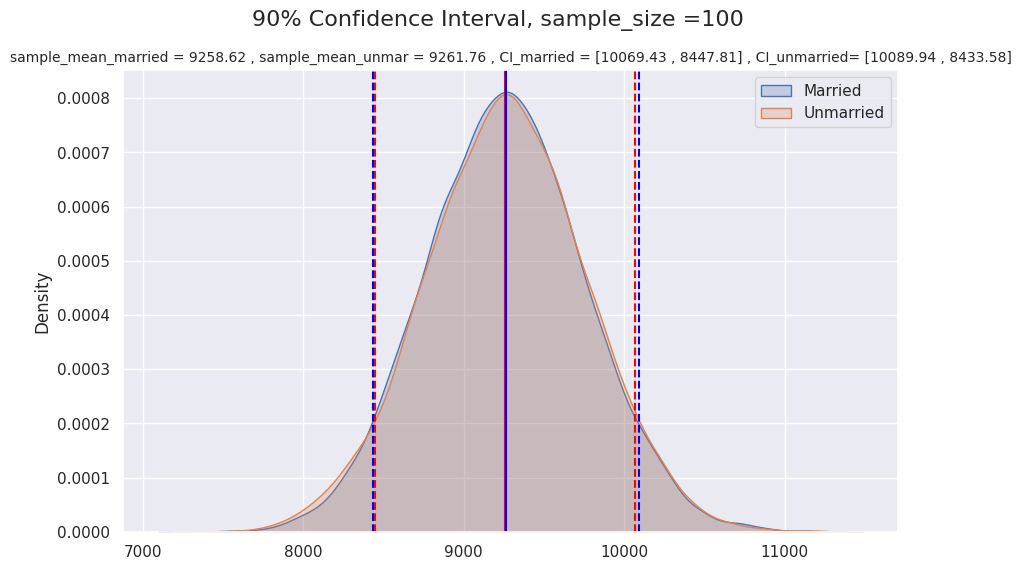

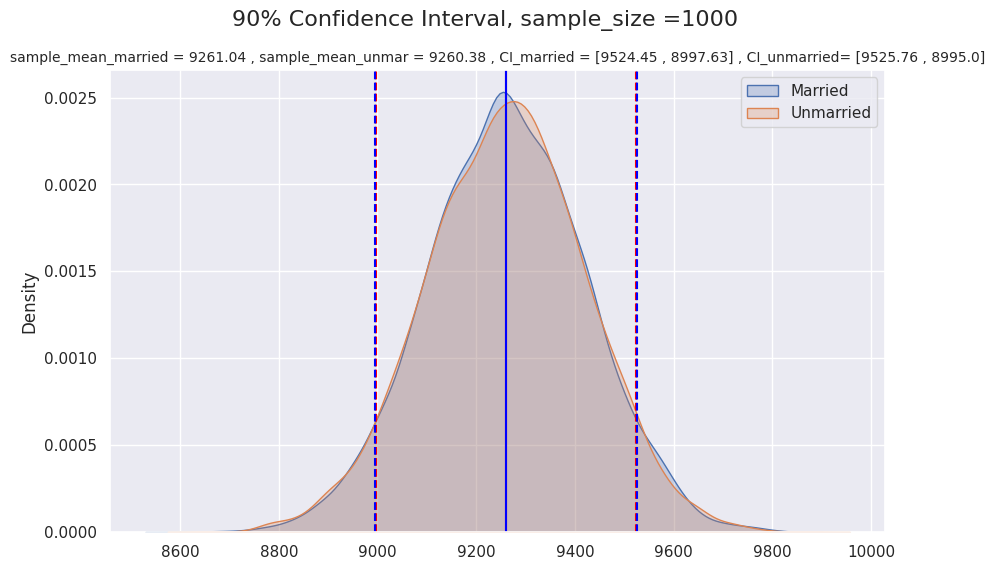

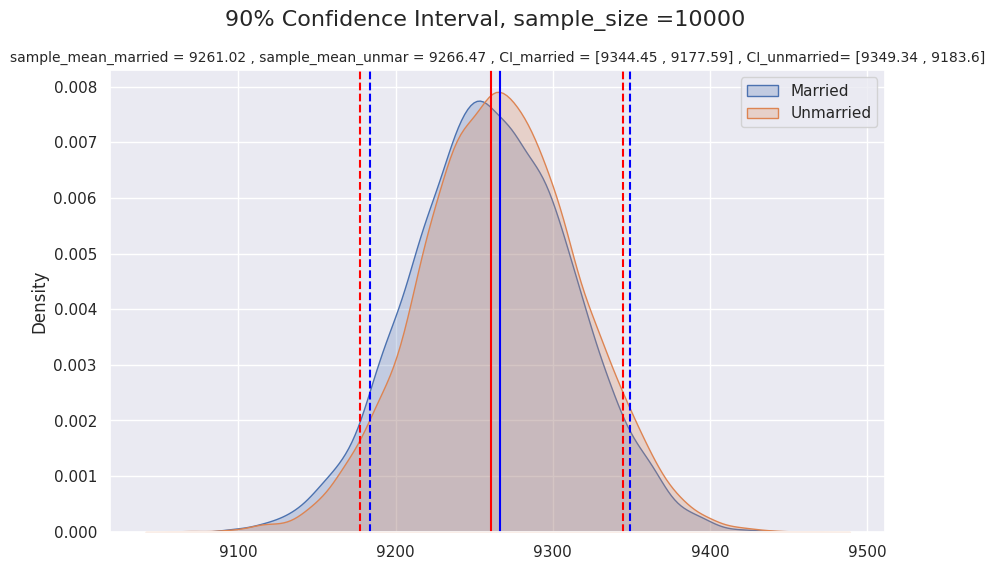

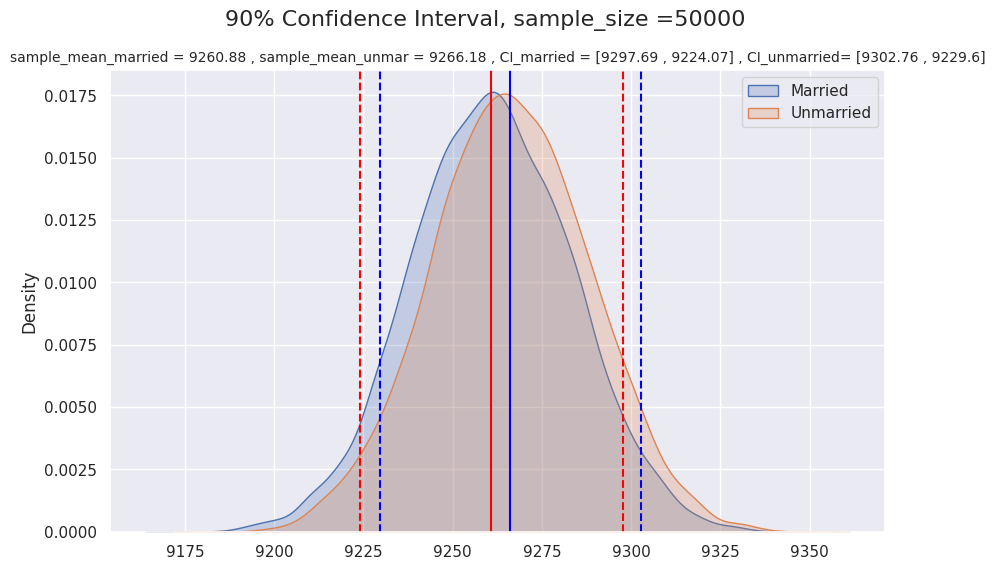

In [ ]:
ci = 90
sample_size =[10, 100, 1000, 10000, 50000]
itr_size = 10000
mar=[]
unmar=[]

for i in sample_size:
    m ,un  = bootstrapping2(df_mar,df_unmar,i, itr_size, ci)
    mar.extend([m])
    unmar.extend([un])

In [ ]:
mar_df = pd.DataFrame(mar,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
mar_df['Range'] = mar_df['upper_limit'] - mar_df['lower_limit']
mar_df['90 % CI'] = '['+mar_df['lower_limit'].astype('str')+' , '+mar_df['upper_limit'].astype('str')+']'
mar_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
mar_df['Marital_Status'] = ['Married']*5
mar_df.set_index('Marital_Status').T

Marital_Status               Married               Married  \
Sample_size                       10                   100   
Sample_mean                  9273.95               9258.62   
std_err                       1606.7                492.94   
Range                        5285.58               1621.62   
90 % CI         [6631.16 , 11916.74]  [8447.81 , 10069.43]   

Marital_Status              Married              Married              Married  
Sample_size                    1000                10000                50000  
Sample_mean                 9261.04              9261.02              9260.88  
std_err                      160.14                50.72                22.38  
Range                        526.82               166.86                73.62  
90 % CI         [8997.63 , 9524.45]  [9177.59 , 9344.45]  [9224.07 , 9297.69]

In [ ]:
unmar_df = pd.DataFrame(unmar,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
unmar_df['Range'] = unmar_df['upper_limit'] - unmar_df['lower_limit']
unmar_df['90 % CI'] = '['+unmar_df['lower_limit'].astype('str')+' , '+unmar_df['upper_limit'].astype('str')+']'
unmar_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
unmar_df['Marital_Status'] = ['Unmarried']*5
unmar_df.set_index('Marital_Status').T

Marital_Status            Unmarried             Unmarried           Unmarried  \
Sample_size                      10                   100                1000   
Sample_mean                 9260.21               9261.76             9260.38   
std_err                     1604.89                 503.5              161.34   
Range                       5279.62               1656.36              530.76   
90 % CI         [6620.4 , 11900.02]  [8433.58 , 10089.94]  [8995.0 , 9525.76]   

Marital_Status           Unmarried           Unmarried  
Sample_size                  10000               50000  
Sample_mean                9266.47             9266.18  
std_err                      50.38               22.24  
Range                       165.74               73.16  
90 % CI         [9183.6 , 9349.34]  [9229.6 , 9302.76]

## 95% Confidence Interval

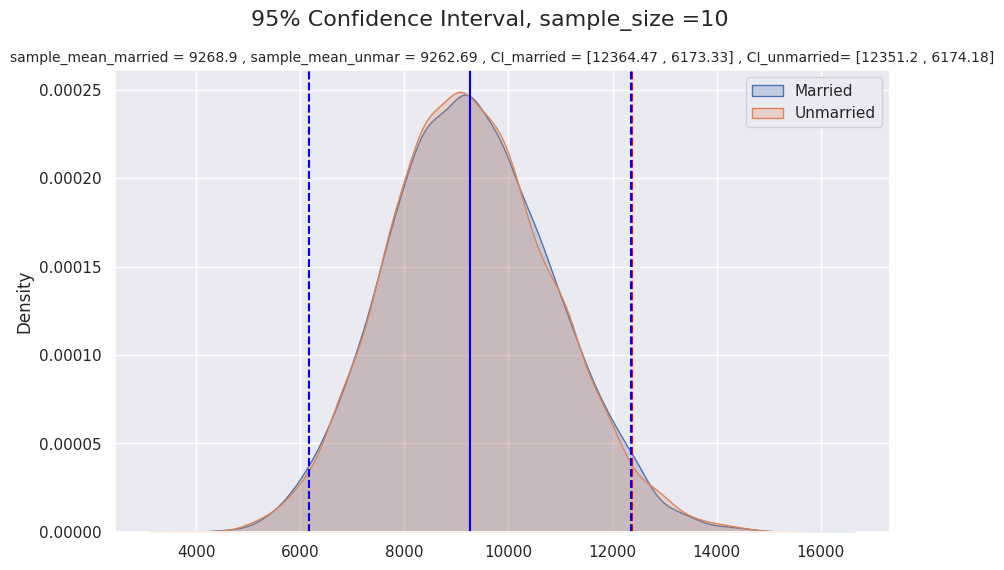

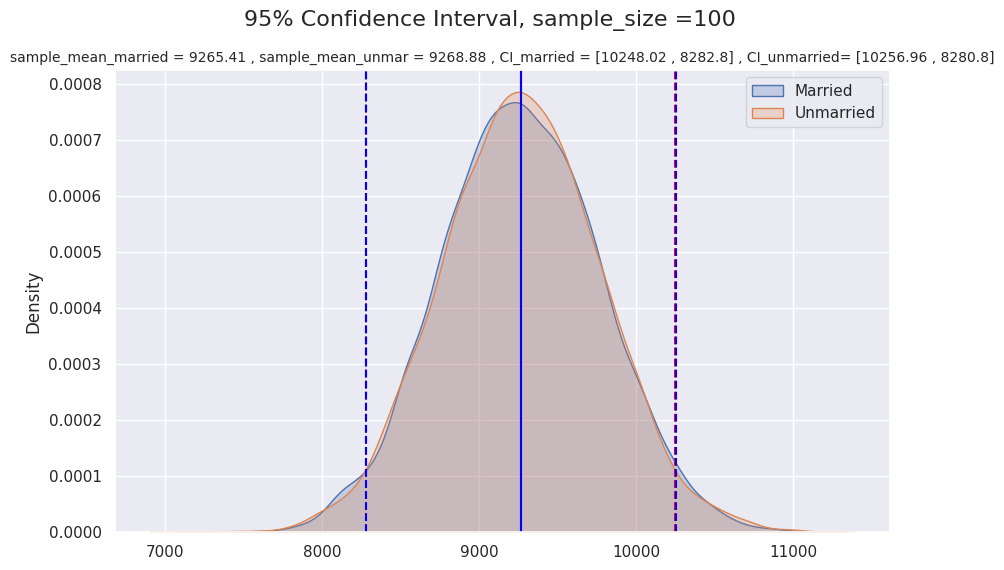

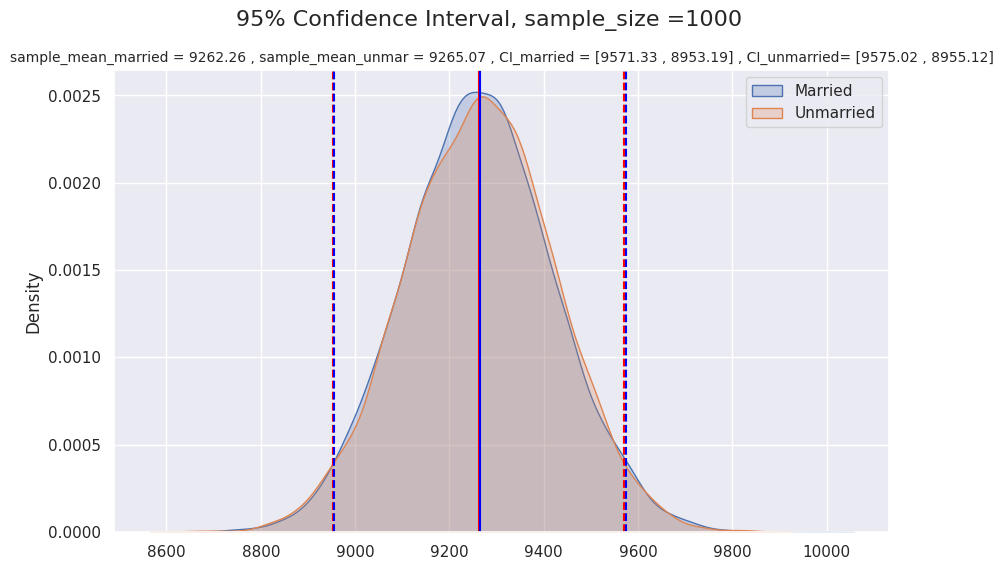

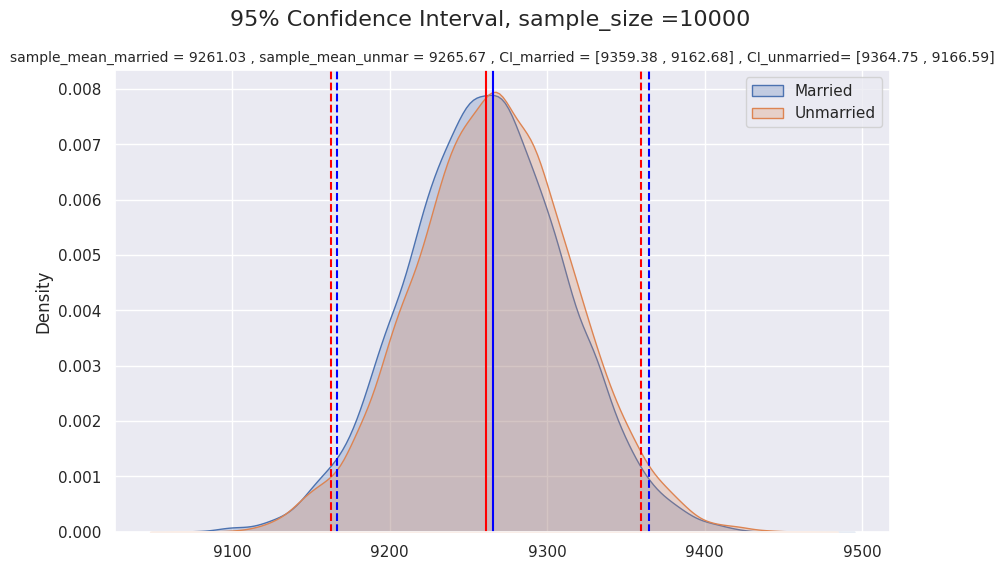

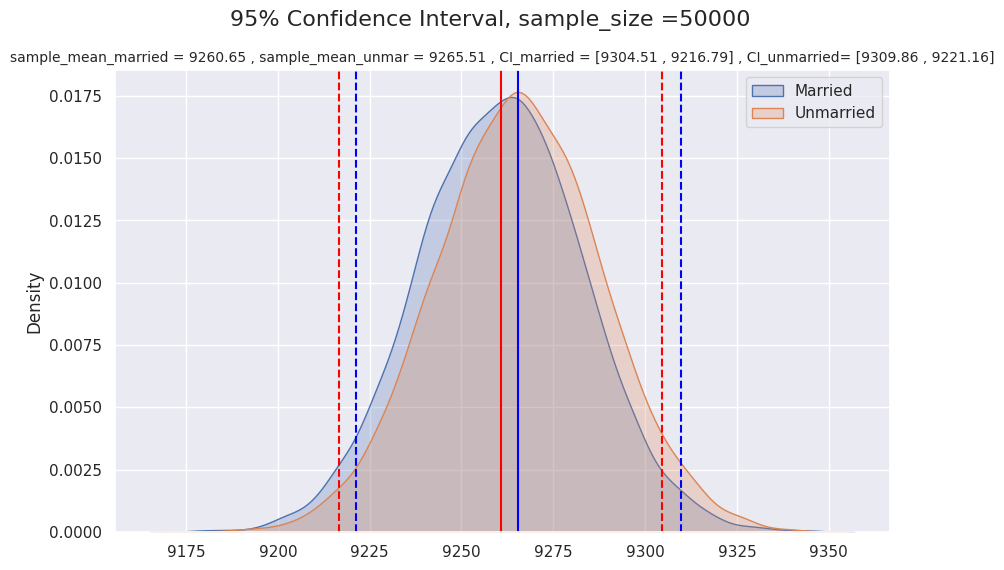

In [ ]:
ci = 95
sample_size =[10, 100, 1000, 10000, 50000]
itr_size = 10000
mar=[]
unmar=[]

for i in sample_size:
    m ,un  = bootstrapping2(df_mar,df_unmar,i, itr_size, ci)
    mar.extend([m])
    unmar.extend([un])

In [ ]:
mar_df = pd.DataFrame(mar,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
mar_df['Range'] = mar_df['upper_limit'] - mar_df['lower_limit']
mar_df['95 % CI'] = '['+mar_df['lower_limit'].astype('str')+' , '+mar_df['upper_limit'].astype('str')+']'
mar_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
mar_df['Marital_Status'] = ['Married']*5
mar_df.set_index('Marital_Status').T

Marital_Status               Married              Married  \
Sample_size                       10                  100   
Sample_mean                   9268.9              9265.41   
std_err                       1579.4               501.34   
Range                        6191.14              1965.22   
95 % CI         [6173.33 , 12364.47]  [8282.8 , 10248.02]   

Marital_Status              Married              Married              Married  
Sample_size                    1000                10000                50000  
Sample_mean                 9262.26              9261.03              9260.65  
std_err                      157.69                50.18                22.38  
Range                        618.14                196.7                87.72  
95 % CI         [8953.19 , 9571.33]  [9162.68 , 9359.38]  [9216.79 , 9304.51]

In [ ]:
unmar_df = pd.DataFrame(unmar,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
unmar_df['Range'] = unmar_df['upper_limit'] - unmar_df['lower_limit']
unmar_df['95 % CI'] = '['+unmar_df['lower_limit'].astype('str')+' , '+unmar_df['upper_limit'].astype('str')+']'
unmar_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
unmar_df['Marital_Status'] = ['Unmarried']*5
unmar_df.set_index('Marital_Status').T

Marital_Status            Unmarried            Unmarried            Unmarried  \
Sample_size                      10                  100                 1000   
Sample_mean                 9262.69              9268.88              9265.07   
std_err                      1575.8               504.13               158.14   
Range                       6177.02              1976.16                619.9   
95 % CI         [6174.18 , 12351.2]  [8280.8 , 10256.96]  [8955.12 , 9575.02]   

Marital_Status            Unmarried            Unmarried  
Sample_size                   10000                50000  
Sample_mean                 9265.67              9265.51  
std_err                       50.55                22.63  
Range                        198.16                 88.7  
95 % CI         [9166.59 , 9364.75]  [9221.16 , 9309.86]

## 99% Confidence Interval

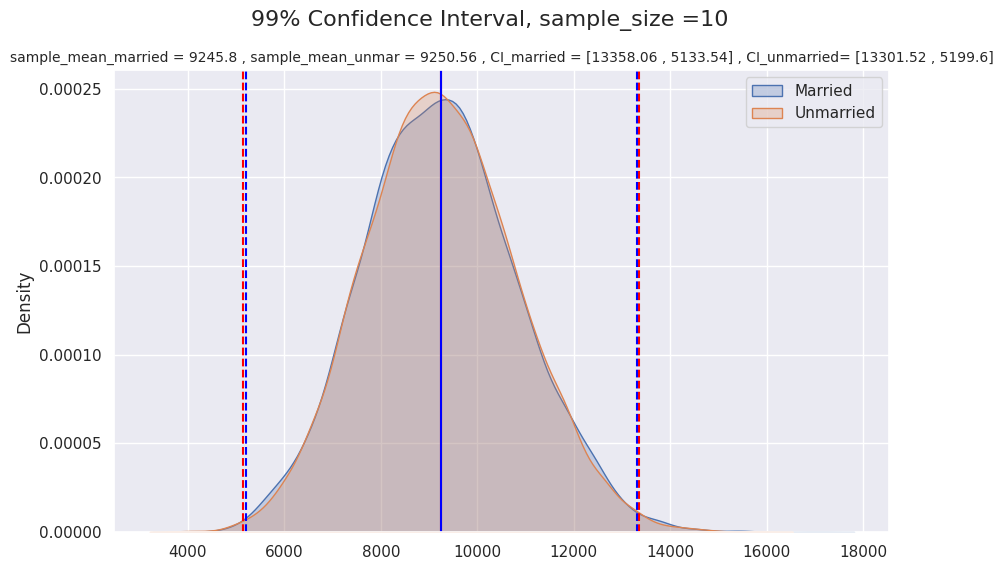

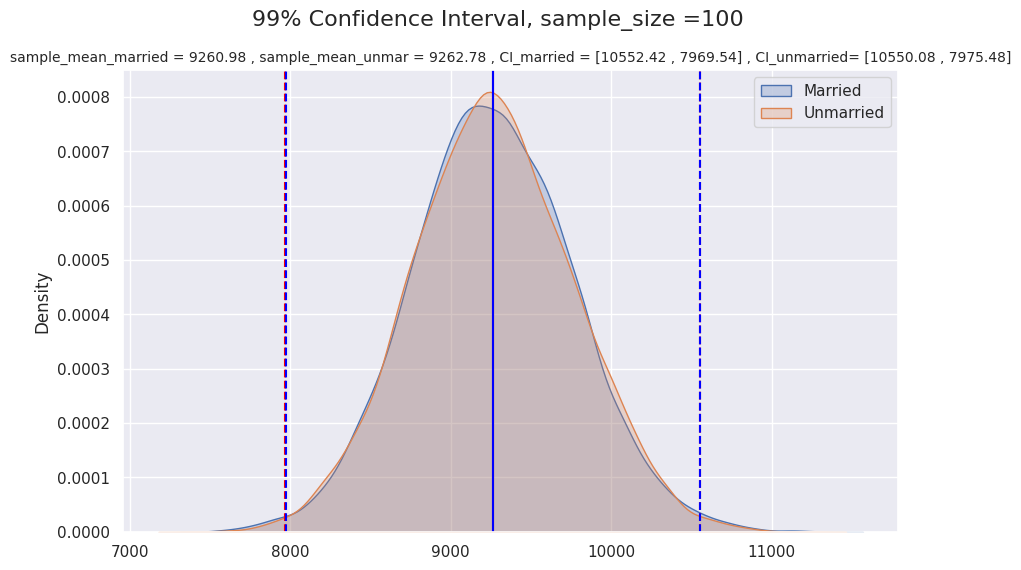

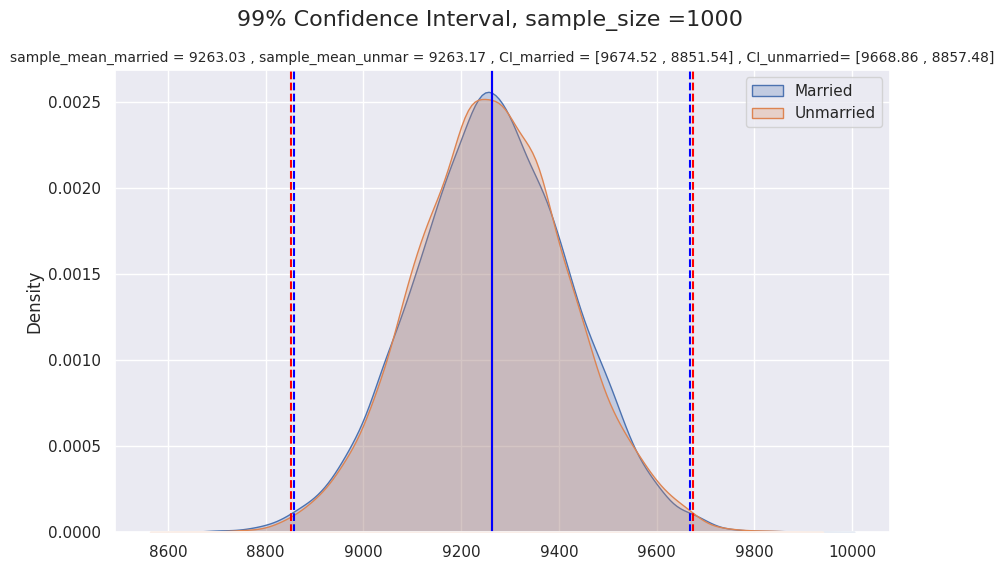

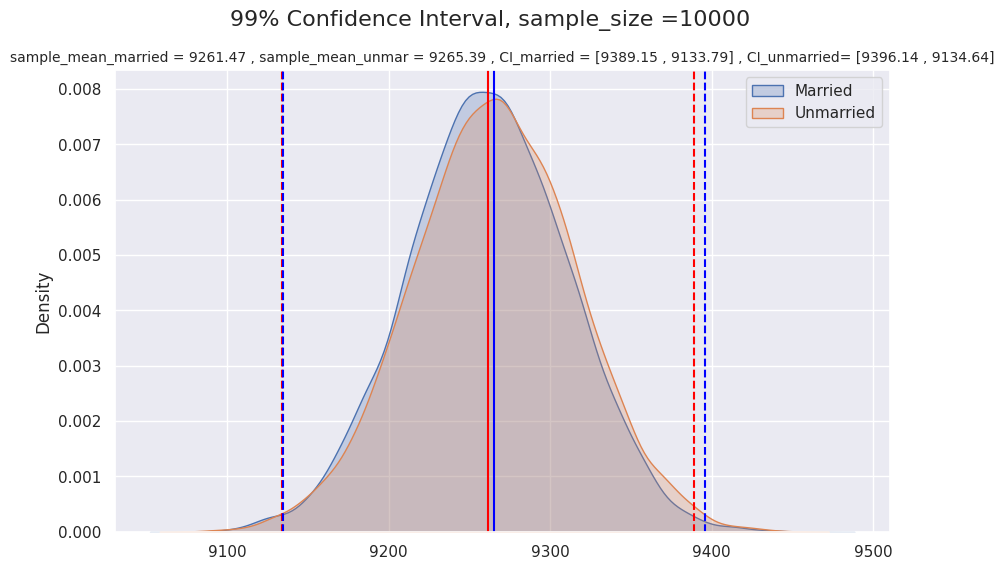

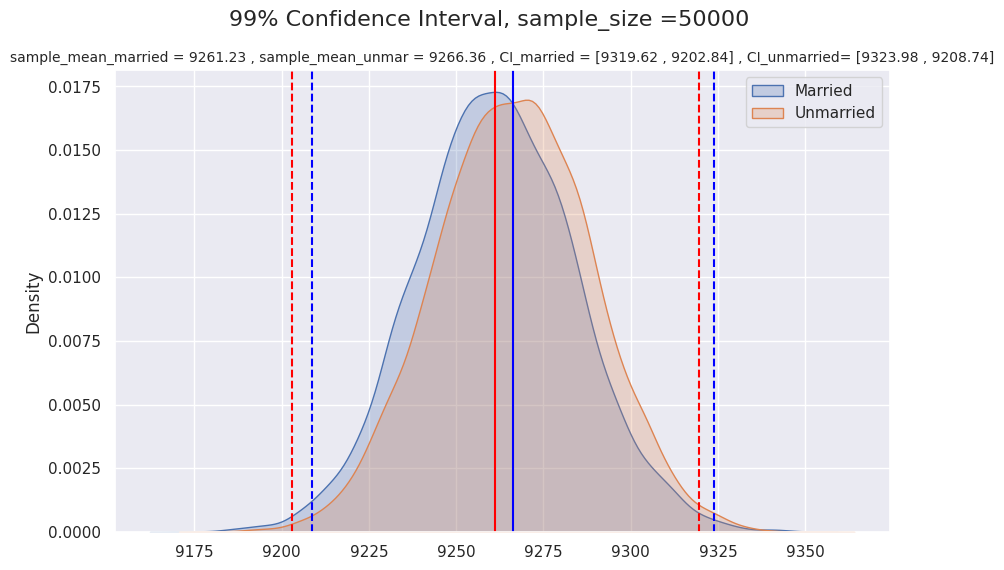

In [ ]:
ci = 99
sample_size =[10, 100, 1000, 10000, 50000]
itr_size = 10000
mar=[]
unmar=[]

for i in sample_size:
    m ,un  = bootstrapping2(df_mar,df_unmar,i, itr_size, ci)
    mar.extend([m])
    unmar.extend([un])

In [ ]:
mar_df = pd.DataFrame(mar,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
mar_df['Range'] = mar_df['upper_limit'] - mar_df['lower_limit']
mar_df['99 % CI'] = '['+mar_df['lower_limit'].astype('str')+' , '+mar_df['upper_limit'].astype('str')+']'
mar_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
mar_df['Marital_Status'] = ['Married']*5
mar_df.set_index('Marital_Status').T

Marital_Status               Married               Married  \
Sample_size                       10                   100   
Sample_mean                   9245.8               9260.98   
std_err                      1596.48                501.37   
Range                        8224.52               2582.88   
99 % CI         [5133.54 , 13358.06]  [7969.54 , 10552.42]   

Marital_Status              Married              Married              Married  
Sample_size                    1000                10000                50000  
Sample_mean                 9263.03              9261.47              9261.23  
std_err                      159.75                49.57                22.67  
Range                        822.98               255.36               116.78  
99 % CI         [8851.54 , 9674.52]  [9133.79 , 9389.15]  [9202.84 , 9319.62]

In [ ]:
unmar_df = pd.DataFrame(unmar,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])
unmar_df['Range'] = unmar_df['upper_limit'] - unmar_df['lower_limit']
unmar_df['99 % CI'] = '['+unmar_df['lower_limit'].astype('str')+' , '+unmar_df['upper_limit'].astype('str')+']'
unmar_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
unmar_df['Marital_Status'] = ['Unmarried']*5
unmar_df.set_index('Marital_Status').T

Marital_Status            Unmarried             Unmarried  \
Sample_size                      10                   100   
Sample_mean                 9250.56               9262.78   
std_err                     1572.68                499.76   
Range                       8101.92                2574.6   
99 % CI         [5199.6 , 13301.52]  [7975.48 , 10550.08]   

Marital_Status            Unmarried            Unmarried            Unmarried  
Sample_size                    1000                10000                50000  
Sample_mean                 9263.17              9265.39              9266.36  
std_err                       157.5                50.76                22.37  
Range                        811.38                261.5               115.24  
99 % CI         [8857.48 , 9668.86]  [9134.64 , 9396.14]  [9208.74 , 9323.98]

**Insights :**

**1. Sample size**

*   From the analysis, it is evident that as the sample size increases, the Confidence Interval becomes more and more narrow and precise.
*   Hence it is proven that, the larger the sample size taken more precise the insights and recommendations can be given.

**2. Confidence Interval**

*   It is observed that for all the sample sizes, the two curves are ovrelapping and hence the Confidence Intervals overlap for the average spending per transaction for Married and Unmarries customers with the samples given.
*   Hence no statistically significant difference between the average spending per transaction for Married and Unmarries customers with the samples given.

*   With 90% CI -

   Married = [9224 , 9298] and  Unmarried = [9229 , 9303]

*   With 95% CI -

   Married = [9217 , 9306] and  Unmarried = [9222 , 9309]

*   With 99% CI -

   Married = [9203 , 9319] and  Unmarried = [9208 , 9323]

**3. Population Mean and Average of Sample Means**

*   It is already found that the pop mean for Married and Unmarried is 9261 and 9266 respectively.


*   With 90% Mean of sample means -

   Married = 9260 and  Unmarried = 9266

*   With 95% Mean of sample means -

   Married = 9261 and  Unmarried = 9266

*   With 99% Mean of sample means -

   Married = 9261 and  Unmarried = 9266

*   Hence Population mean ~= Average of sample means

**4. Expences by Married Vs Unmarried**

*   It is most evident that Married and Unmarried spend almost equal amount per transaction.

# 3. Age Vs Purchase_Amount

In [ ]:
df_age = df.groupby('Age')['Purchase_Amount'].describe().T
df_age

Age            0-17         18-25          26-35          36-45         46-50  \
count  15102.000000  99660.000000  219587.000000  110013.000000  45701.000000   
mean    8933.464640   9169.663606    9252.690633    9331.350695   9208.625697   
std     5111.114046   5034.321997    5010.527303    5022.923879   4967.216367   
min       12.000000     12.000000      12.000000      12.000000     12.000000   
25%     5328.000000   5415.000000    5475.000000    5876.000000   5888.000000   
50%     7986.000000   8027.000000    8030.000000    8061.000000   8036.000000   
75%    11874.000000  12028.000000   12047.000000   12107.000000  11997.000000   
max    23955.000000  23958.000000   23961.000000   23960.000000  23960.000000   

Age           51-55           55+  
count  38501.000000  21504.000000  
mean    9534.808031   9336.280459  
std     5087.368080   5011.493996  
min       12.000000     12.000000  
25%     6017.000000   6018.000000  
50%     8130.000000   8105.500000  
75%    12462.000000  11932.000000  
max    23960.000000  23960.000000

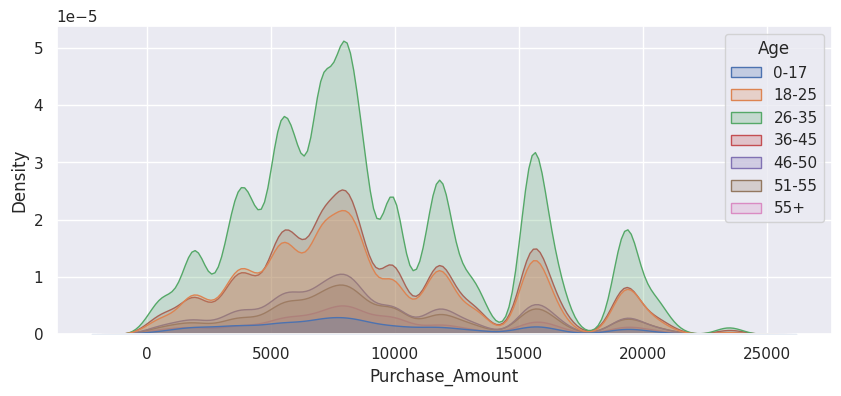

In [ ]:
sns.set(rc={"figure.figsize":(10,4)})
sns.kdeplot(df,x = 'Purchase_Amount',hue='Age', fill=True)
plt.show()

**Insights :**

**1. Average Transaction Value**

*   The average transaction for the customers falling in the age group of 26-35 which contribute to 40% of transactions = 9253 USD
*   The average transaction for the customers falling in the age group of 36-55 which contribute to 42% of transactions = 9331 USD
*   The average transaction for the customers falling in the age group of 0-17 which contribute to 2.7% of transactions = 8933 USD.

## Bootstrapping for Age column

In [ ]:
df_a1 = df.loc[df['Age']=='0-17','Purchase_Amount']
df_a2 = df.loc[df['Age']=='18-25', 'Purchase_Amount']
df_a3 = df.loc[df['Age']=='26-35','Purchase_Amount']
df_a4 = df.loc[df['Age']=='36-45', 'Purchase_Amount']
df_a5 = df.loc[df['Age']=='46-50','Purchase_Amount']
df_a6 = df.loc[df['Age']=='51-55', 'Purchase_Amount']
df_a7 = df.loc[df['Age']=='55+','Purchase_Amount']

In [ ]:
def bootstrapping3(df_a1, df_a2, df_a3, df_a4, df_a5, df_a6, df_a7, sample_size, itr_size,ci):

    a1_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_a1, sample_size)) for j in range(itr_size)]

    a2_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_a2, sample_size)) for j in range(itr_size)]

    a3_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_a3, sample_size)) for j in range(itr_size)]

    a4_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_a4, sample_size)) for j in range(itr_size)]

    a5_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_a5, sample_size)) for j in range(itr_size)]

    a6_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_a6, sample_size)) for j in range(itr_size)]

    a7_bootstrapped_sample_means_list = [np.mean(np.random.choice(df_a7, sample_size)) for j in range(itr_size)]


    sample_mean_a1 = np.mean(a1_bootstrapped_sample_means_list).round(2)
    sample_mean_a2 = np.mean(a2_bootstrapped_sample_means_list).round(2)
    sample_mean_a3 = np.mean(a3_bootstrapped_sample_means_list).round(2)
    sample_mean_a4 = np.mean(a4_bootstrapped_sample_means_list).round(2)
    sample_mean_a5 = np.mean(a5_bootstrapped_sample_means_list).round(2)
    sample_mean_a6 = np.mean(a6_bootstrapped_sample_means_list).round(2)
    sample_mean_a7 = np.mean(a7_bootstrapped_sample_means_list).round(2)


    sde_a1= np.std(a1_bootstrapped_sample_means_list).round(2)
    sde_a2= np.std(a2_bootstrapped_sample_means_list).round(2)
    sde_a3= np.std(a3_bootstrapped_sample_means_list).round(2)
    sde_a4= np.std(a4_bootstrapped_sample_means_list).round(2)
    sde_a5= np.std(a5_bootstrapped_sample_means_list).round(2)
    sde_a6= np.std(a6_bootstrapped_sample_means_list).round(2)
    sde_a7= np.std(a7_bootstrapped_sample_means_list).round(2)

    c = ci/100
    ll_a1 = (norm.ppf((1-c)/2)*sde_a1 + sample_mean_a1).round(2)
    ll_a2 = (norm.ppf((1-c)/2)*sde_a2 + sample_mean_a2).round(2)
    ll_a3 = (norm.ppf((1-c)/2)*sde_a3 + sample_mean_a3).round(2)
    ll_a4 = (norm.ppf((1-c)/2)*sde_a4 + sample_mean_a4).round(2)
    ll_a5 = (norm.ppf((1-c)/2)*sde_a5 + sample_mean_a5).round(2)
    ll_a6 = (norm.ppf((1-c)/2)*sde_a6 + sample_mean_a6).round(2)
    ll_a7 = (norm.ppf((1-c)/2)*sde_a7 + sample_mean_a7).round(2)



    ul_a1 = (norm.ppf(c + ((1-c)/2))*sde_a1 + sample_mean_a1).round(2)
    ul_a2 = (norm.ppf(c + ((1-c)/2))*sde_a2 + sample_mean_a2).round(2)
    ul_a3 = (norm.ppf(c + ((1-c)/2))*sde_a3 + sample_mean_a3).round(2)
    ul_a4 = (norm.ppf(c + ((1-c)/2))*sde_a4 + sample_mean_a4).round(2)
    ul_a5 = (norm.ppf(c + ((1-c)/2))*sde_a5 + sample_mean_a5).round(2)
    ul_a6 = (norm.ppf(c + ((1-c)/2))*sde_a6 + sample_mean_a6).round(2)
    ul_a7 = (norm.ppf(c + ((1-c)/2))*sde_a7 + sample_mean_a7).round(2)

    plt.figure(figsize=(10,6))
    plt.suptitle(f'{ci}% Confidence Interval, sample_size ={sample_size}', fontsize=16)
    sns.kdeplot(data = a1_bootstrapped_sample_means_list, fill=True, label ='0-17')
    sns.kdeplot(data = a2_bootstrapped_sample_means_list, fill=True, label ='18-25')
    sns.kdeplot(data = a3_bootstrapped_sample_means_list, fill=True, label ='26-35')
    sns.kdeplot(data = a4_bootstrapped_sample_means_list, fill=True, label ='36-45')
    sns.kdeplot(data = a5_bootstrapped_sample_means_list, fill=True, label ='46-50')
    sns.kdeplot(data = a6_bootstrapped_sample_means_list, fill=True, label ='50-55')
    sns.kdeplot(data = a7_bootstrapped_sample_means_list, fill=True, label ='55+')

    plt.legend()

    plt.show()
    a1_df = [sample_size,sample_mean_a1, sde_a1, ll_a1, ul_a1]
    a2_df = [sample_size,sample_mean_a2, sde_a2, ll_a2, ul_a2]
    a3_df = [sample_size,sample_mean_a3, sde_a3, ll_a3, ul_a3]
    a4_df = [sample_size,sample_mean_a4, sde_a4, ll_a4, ul_a4]
    a5_df = [sample_size,sample_mean_a5, sde_a5, ll_a5, ul_a5]
    a6_df = [sample_size,sample_mean_a6, sde_a6, ll_a6, ul_a6]
    a7_df = [sample_size,sample_mean_a7, sde_a7, ll_a7, ul_a7]

    return [a1_df, a2_df, a3_df, a4_df, a5_df, a6_df, a7_df]

#Note : We shall only compute the 95% Confidence Interval for the Age column.

## 95% Confidence Interval

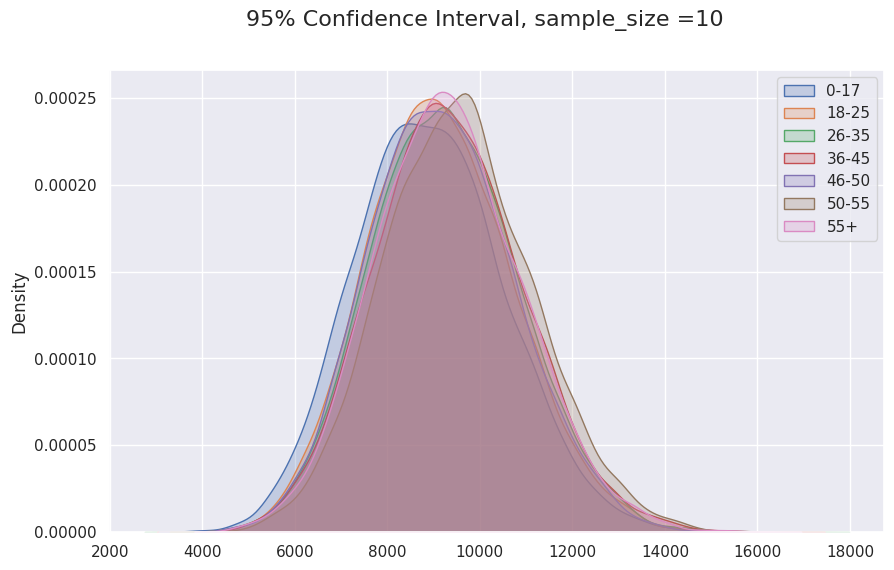

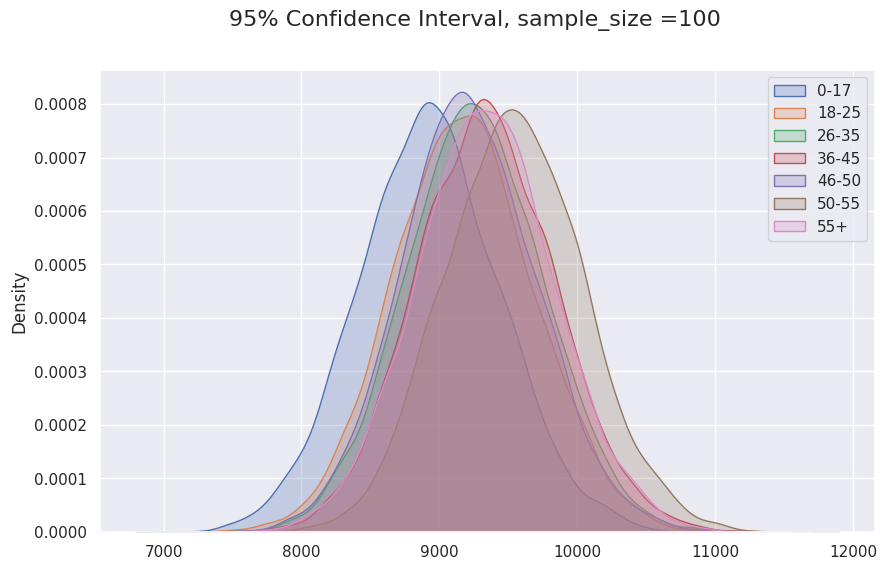

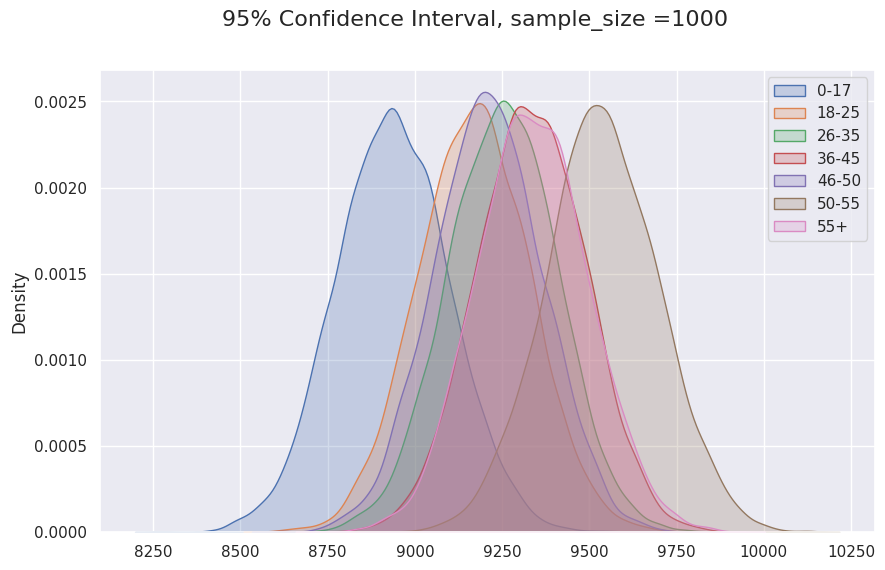

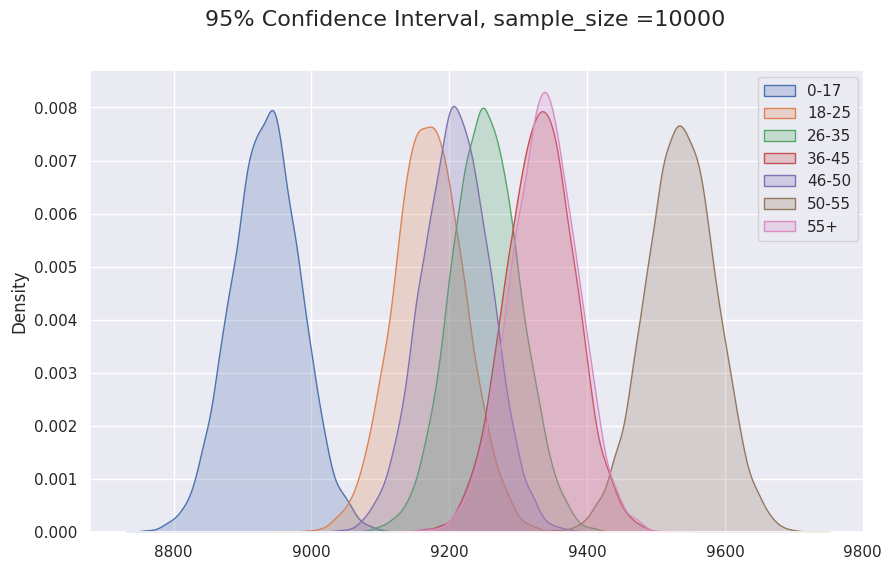

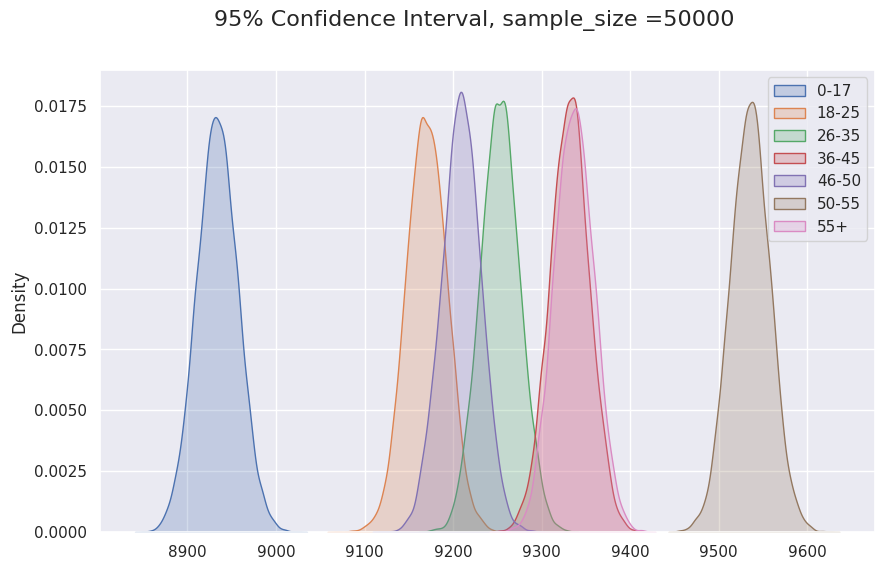

In [ ]:
ci = 95
sample_size =[10, 100, 1000, 10000, 50000]
itr_size = 10000
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
a7=[]

for i in sample_size:
    c1,c2,c3,c4,c5,c6,c7  = bootstrapping3(df_a1, df_a2, df_a3, df_a4, df_a5, df_a6, df_a7,i, itr_size, ci)
    a1.extend([c1])
    a2.extend([c2])
    a3.extend([c3])
    a4.extend([c4])
    a5.extend([c5])
    a6.extend([c6])
    a7.extend([c7])

In [ ]:
age_df = pd.DataFrame(a1+a2+a3+a4+a5+a6+a7,
                    columns=['Sample_size' , 'Sample_mean' , 'std_err' ,'lower_limit', 'upper_limit' ])

age_df['Range'] = age_df['upper_limit'] - age_df['lower_limit']
age_df['95% CI'] = '['+age_df['lower_limit'].astype('str')+' , '+age_df['upper_limit'].astype('str')+']'
age_df.drop(columns=['lower_limit', 'upper_limit'],inplace=True)
age_df['Age'] = ['0-17']*5 +  ['18-25']*5 +  ['26-35']*5 +  ['36-45']*5 +  ['46-50']*5+  ['51-55']*5 + ['55+']*5

In [ ]:
age_df.pivot(index=['Age'],
            columns = ['Sample_size'],
            values =  [ '95% CI', 'Range'])

95% CI                                             \
Sample_size                 10                    100                  1000    
Age                                                                            
0-17          [5767.1 , 12076.18]   [7922.68 , 9928.58]  [8618.57 , 9251.37]   
18-25        [6057.43 , 12229.51]  [8180.32 , 10169.92]  [8856.09 , 9480.45]   
26-35        [6135.38 , 12366.06]  [8276.87 , 10232.63]  [8943.38 , 9557.48]   
36-45          [6166.4 , 12484.7]  [8348.17 , 10325.11]  [9026.42 , 9638.94]   
46-50        [6101.77 , 12245.79]  [8250.07 , 10174.71]  [8902.06 , 9513.96]   
51-55         [6385.1 , 12697.24]  [8557.27 , 10525.15]  [9217.04 , 9852.34]   
55+          [6204.09 , 12440.97]  [8355.34 , 10317.96]  [9025.18 , 9648.02]   

                                                         Range           \
Sample_size                10000                50000    10       100     
Age                                                                       
0-17         [8835.12 , 9032.52]  [8888.22 , 8978.84]  6309.08   2005.9   
18-25        [9071.31 , 9269.73]  [9125.13 , 9214.23]  6172.08   1989.6   
26-35        [9154.43 , 9349.49]  [9209.21 , 9296.15]  6230.68  1955.76   
36-45        [9234.97 , 9429.35]  [9287.46 , 9374.92]   6318.3  1976.94   
46-50        [9111.42 , 9306.28]   [9165.08 , 9252.5]  6144.02  1924.64   
51-55        [9435.22 , 9635.56]   [9491.0 , 9579.16]  6312.14  1967.88   
55+          [9240.17 , 9433.35]  [9292.77 , 9379.99]  6236.88  1962.62   

                                    
Sample_size   1000    10000  50000  
Age                                 
0-17          632.8   197.4  90.62  
18-25        624.36  198.42   89.1  
26-35         614.1  195.06  86.94  
36-45        612.52  194.38  87.46  
46-50         611.9  194.86  87.42  
51-55         635.3  200.34  88.16  
55+          622.84  193.18  87.22

**Insights :**

**1. Sample size**

*   From the analysis, it is evident that as the sample size increases, the Confidence Interval becomes more and more narrow and precise.
*   Hence it is proven that, the larger the sample size taken more precise the insights and recommendations can be given.

**2. Confidence Interval**

*   It is observed that for all the sample sizes, the two curves are ovrelapping and hence the Confidence Intervals overlap for the average spending per transaction for some of the Age groups.
*   Hence to find statistically significant difference between the average spending per transaction for Age group we can club the following Age groups.

*   Lowest average spend per transaction -> 0-17

*   Overlapping CI and hence no difference in average spend per transaction -> 18-25, 26-35, 36-45, 46-50, 55+

*   Highest average spend per trasaction -> 51-55

**3. Population Mean and Average of Sample Means**

*   With 95% Confidence Intervals -

    *   0-17 = [8888, 8978]
    *   18-25 = [9125, 9214]
    *   26-35 = [9209, 9297]
    *   36-45 = [9288, 9375]
    *   46-50 = [9166, 9251]
    *   51-55 = [9490, 9579]
    *   55+ = [9291, 9380]


*   Hence Population mean ~= Average of sample means

#Insights :

**1. User_ID** - Out of 550068 transactions by the users, there are only 5891 unique User_ID.

**2. Product_ID** - There are 3631 unique Products_IDs, where the product with the ID = P00265242 is the most sold product with a frequency of 1880.

**3. Gender** - Most of the products are purchased by Males as compared to Female customers. About 75% of the transactions were done by Male customers and 25% are Female customers.

**4. Age** - The age groups were binned into 7 groups. Here most transactions were made by the customer falling in the age group of 26-35 years (about 40% transactions ) with a count of 219587 transactions.

**5. Occupation** - There are 21 categories of unique occupations, where most of the transactions were made by the customers whose occupation is 4(masked). The top 5 Occupations of the customers having a greater number of transactions are 4, 0, 7, 1, and 17 (in descending order).

**6. City_Category** - There are 3 cities. Almost a greater number of transactions about 42% of the customers are from city B.

**7. Stay_In_Current_City_Years** - The customers' Stay in Years is categorized into 5 categories (0,1,2,3,4+)years. About 193821 transactions are made by the customers having a stay of 1 year in the current city.

**8. Marital_Status** - It is significant that 59 % of the transactions were done by Unmarried customers. And 41 % of transactions were made by customers who are Married.

**9. Product_Category** - There are about 20 unique product categories. The top-selling product categories are 5, 1, and 8(masked).

**10. Purchase_Amount** - There are 2677 outliers i.e., about 0.48% of the total data present in the Purchase_Amount column. These transactions are of super high Purchase_Amounts.

•	Statistical Description :

o	The majority of the customer's Purchase amount is between 5823 USD and 12054 USD.

o	The median Purchase amount is 8047 USD.

o	The lower limit is 12 USD and the upper limit is 21400 USD.

*   It is Male Customers who do greater number of transactions than Female Customers, regardless of the attributes under consideration.

*   It is evident that the mean remains the same for Married and Unmarried Customers regardless of the attributes under consideration. Hence there is no statistically significant effect of the customers' Marital Status for the transactions they do.


# Recommendations :

**1. Gender**

 *  It is Men who spend more on Black Friday than Women. Hence target Men to elevate sales and profit.

*   The Business Company has to take the initiative to attract Female customers to buy female -oriented products by better use of marketing strategies through online and offline modes.

**2. Age**

*   The customers falling in the age group 51-55 hava the highest spend per transaction. Hence personalised shopping experience can be given to these customers to enhance their experience.

*   Focus more on young, and middle-aged adults (18-25, 26-35, 36-45), as these customers are active and interested in spending by purchasing more things.

*  The age group 0-17 has the least spend. Hence the Business Company has to give attractive offers like combo offers and reasonable discounts on kids products like toys and games, so as to improve sales on the customers ages 0-17

**3. Stay_In_Current_City_Years**

*   To give shopping coupons to the new people having a stay in the current city for 1 year or less who account for a greater percentage of purchases compared to others, which creates a best impression on the Company which inturn increases sales and profit.

*   Also customers staying for more than 4 years must be given loyalty coupons to retain such loyal customers, thus increasing the sales.

**4. Product_Category and Product_ID**

*   The most frequently purchased Product_categories are 5, 1, 8 with a much higher significance compared to other Product_category.
The price can be slightly raised to see more profits on these products.

*   Along with these top-selling (most demanded Products) Product_category, combo offers of the products from least selling categories can be given, so as to market them which in turn increases the sales too.

*   Make sure to keep the warehouse with these most sold Products always in stock.

**5. Occupation**

*   The customers being in the top 5 Occupations 4, 0, 7, 1, 17 make the highest number of transactions.

*   Marketing products to these customers especially can easily make more profits as they generate more income to spend.

**6. City**

*   The highest Purchase_Amount was generated by the customers from City B. Hence rewards can be given to the customer from this city chosen in lucky draw, just to give them a happy shopping experience.